# Data Understanding

### Settings/Functions
Read in settings and functions.

In [30]:
libraries <-c('here','arsenal','psych','corrplot','Hmisc','MASS','broom','outliers','raster','caret')
suppressMessages(lapply(libraries, require, character.only = TRUE))
suppressWarnings(source(here::here('Stock Estimation', 'settings.R')))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

### Data
Read in the data and take an initial look.

In [2]:
# Create a list of datasets
files <- list.files(path=dir$data)

# Read in each dataset
for (i in 1:length(files)){
  data <- fread(paste0(dir$data, files[i]))
  year <- sub('\\_.*', '', files[i])
  assign(paste0('f',year), data)
}

## Describing the Data

### Data Shape

 - The current shape of the data sets are in a wide format which will make it convenient to perform exploratory analysis. However, the data sets do not contain a "Year" variable and are not combined in a single dataset. Before any analysis can be performed, this variable will need to be added to each data set and the five data sets will need to combined into one large dataset. 

In [3]:
#Checking the dimensions of each dataset
dim(f2014)
dim(f2015)
dim(f2016)
dim(f2017)
dim(f2018)

#Adding a year variable to each dataset
f2014[, Year := 2014]
f2015[, Year := 2015]
f2016[, Year := 2016]
f2017[, Year := 2017]
f2018[, Year := 2018]

[1] 3808  225

[1] 4120  225

[1] 4797  225

[1] 4960  225

[1] 4392  225

##### The function comparedf() allows a detailed overview of differences between datasets and notifies which column names don't match.

In [4]:
# NOTE: The following code has been commmented out due to the length of its output.

#summary(comparedf(f2014, f2015), max.print.obs = 1)
#summary(comparedf(f2014, f2016), max.print.obs = 1)
#summary(comparedf(f2014, f2017), max.print.obs = 1)
#summary(comparedf(f2014, f2018), max.print.obs = 1)

#summary(comparedf(f2015, f2016), max.print.obs = 1)
#summary(comparedf(f2015, f2017), max.print.obs = 1)
#summary(comparedf(f2015, f2018), max.print.obs = 1)

#summary(comparedf(f2016, f2017), max.print.obs = 1)
#summary(comparedf(f2016, f2018), max.print.obs = 1)
#summary(comparedf(f2017, f2018), max.print.obs = 1)

##### A simpler way to check for different column names only is to use the setdiff() function and change out the column names of each data set and explore their differences.

In [5]:
a <- names(f2014)
b <- names(f2015)
c <- names(f2016)
d <- names(f2017)
e <- names(f2018)

setdiff(e,a)
setdiff(b,e)

[1] "V1"                 "2019 PRICE VAR [%]"

[1] "nextYR_PRICE_VAR"

##### The above information led to the need for the following code to ensure that all variable names match across data sets.

In [6]:
f2015 <- rename(f2015, "Stock" = "V1")
f2016 <- rename(f2016, "Stock" = "V1")
f2017 <- rename(f2017, "Stock" = "V1")
f2018 <- rename(f2018, "Stock" = "V1", "nextYR_PRICE_VAR" = "2019 PRICE VAR [%]")

### Data Type

 - The data set contains the following data types:
    - Character (2) "Stock" & "Sector"
    - Integer (1)
    - Numeric (223)

In [7]:
#Combining datasets and checking variable types
data <- rbindlist(list(f2014, f2015, f2016, f2017, f2018))
table(sapply(data, class))


character   integer   numeric 
        2         1       223 

 - Variable Types:
    - "Stock", "Sector", "Year", "Class" are the main categorical variables in the data set.
    - The remaining variables are continuous.

In [8]:
# NOTE: The following code has been commmented out due to the length of its output.
#str(f2014)
#str(f2015)
#str(f2016)
#str(f2017)
#str(f2018)

### Data Amount

 - There are five datasets in CSV format containing the following variables and observations:
    - 2014: 226 variables & 3808 observations
    - 2015: 226 variables & 4120 observations
    - 2016: 226 variables & 4797 observations
    - 2017: 226 variables & 4960 observations
    - 2018: 226 variables & 4392 observations
 - The combined total for these five data sets is 226 variables & 22077 observations.

In [9]:
#The dim() function returns the number of rows and columns in a dataset.
dim(f2014)
dim(f2015)
dim(f2016)
dim(f2017)
dim(f2018)
dim(data)

[1] 3808  226

[1] 4120  226

[1] 4797  226

[1] 4960  226

[1] 4392  226

[1] 22077   226

## Exploring the Data

In [10]:
#Reordering the dataset so that variables of interest are at the beginning.
data <- data %>%
  dplyr::select('Stock', 'nextYR_PRICE_VAR', 'Class', 'Year', 'Sector', everything())
str(data)

Classes 'data.table' and 'data.frame':	22077 obs. of  226 variables:
 $ Stock                                     : chr  "PG" "VIPS" "KR" "RAD" ...
 $ nextYR_PRICE_VAR                          : num  -9.32 -25.51 33.12 2.75 12.9 ...
 $ Class                                     : int  0 0 1 1 1 1 1 0 1 1 ...
 $ Year                                      : num  2014 2014 2014 2014 2014 ...
 $ Sector                                    : chr  "Consumer Defensive" "Consumer Defensive" "Consumer Defensive" "Consumer Defensive" ...
 $ Revenue                                   : num  7.44e+10 3.73e+09 9.84e+10 2.55e+10 1.79e+10 ...
 $ Revenue Growth                            : num  -0.0713 1.1737 0.0182 0.0053 0.0076 ...
 $ Cost of Revenue                           : num  3.90e+10 2.81e+09 7.81e+10 1.82e+10 1.15e+10 ...
 $ Gross Profit                              : num  3.54e+10 9.29e+08 2.02e+10 7.32e+09 6.37e+09 ...
 $ R&D Expenses                              : num  0.00 1.08e+08 0.00 0.00

In [11]:
#Checking for NA values
apply(is.na(data),2,sum)

# After looking at variables with NA, operatingCycle & cashConversionCycle were removed
# since they contained an unusual number of NAs.
data <- data[, -c('operatingCycle', 'cashConversionCycle')] 
dim(data)
head(data)

Stock 
                                         0 
                          nextYR_PRICE_VAR 
                                         0 
                                     Class 
                                         0 
                                      Year 
                                         0 
                                    Sector 
                                         0 
                                   Revenue 
                                      1171 
                            Revenue Growth 
                                      2088 
                           Cost of Revenue 
                                      1771 
                              Gross Profit 
                                      1207 
                              R&D Expenses 
                                      2138 
                              SG&A Expense 
                                      1669 
                        Operating Expenses 
                                      1702 
                          Operating Income 
                                      1101 
                          Interest Expense 
                                      1719 
                       Earnings before Tax 
                                      1364 
                        Income Tax Expense 
                                      1588 
          Net Income - Non-Controlling int 
                                      2259 
             Net Income - Discontinued ops 
                                      2259 
                                Net Income 
                                      1565 
                       Preferred Dividends 
                                      2259 
                            Net Income Com 
                                      1391 
                                       EPS 
                                      1301 
                               EPS Diluted 
                                      1292 
                  Weighted Average Shs Out 
                                      1494 
            Weighted Average Shs Out (Dil) 
                                      1937 
                        Dividend per Share 
                                      2259 
                              Gross Margin 
                                      1199 
                             EBITDA Margin 
                                      2447 
                               EBIT Margin 
                                      1674 
                             Profit Margin 
                                      2444 
                     Free Cash Flow margin 
                                      2291 
                                    EBITDA 
                                      1754 
                                      EBIT 
                                      1425 
                       Consolidated Income 
                                      1567 
                Earnings Before Tax Margin 
                                      1195 
                         Net Profit Margin 
                                      1722 
                 Cash and cash equivalents 
                                      1179 
                    Short-term investments 
                                      2712 
           Cash and short-term investments 
                                      2475 
                               Receivables 
                                      1105 
                               Inventories 
                                      1831 
                      Total current assets 
                                      2522 
           Property, Plant & Equipment Net 
                                      1659 
            Goodwill and Intangible Assets 
                                      1437 
                     Long-term investments 
                                      2633 
                                Tax assets 
                                 

[1] 22077   224

Stock,nextYR_PRICE_VAR,Class,Year,Sector,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PG,-9.323276,0,2014,Consumer Defensive,74401000000,-0.0713,39030000000,35371000000,0,...,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746
VIPS,-25.512193,0,2014,Consumer Defensive,3734148046,1.1737,2805625444,928522603,108330320,...,NA,NA,NA,NA,NA,NA,NA,NA,1.6484,1.7313
KR,33.118297,1,2014,Consumer Defensive,98375000000,0.0182,78138000000,20237000000,0,...,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234
RAD,2.752291,1,2014,Consumer Defensive,25526413000,0.0053,18202679000,7323734000,0,...,0.0000,0.0000,0.0000,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060
GIS,12.897715,1,2014,Consumer Defensive,17909600000,0.0076,11539800000,6369800000,0,...,0.1092,0.1250,0.1144,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220
PM,13.980937,1,2014,Consumer Defensive,80106000000,0.0010,60775000000,19331000000,0,...,0.0000,0.1161,0.1122,0.0392,-0.1274,-0.0781,-0.6769,0.0642,0.0000,0.0161


### Exploratory Analysis

#### Statistical Description

 1. Scrolling through the summary, it is easy to see that the min and max of many of the variables are far outside of the 1st and 3rd quartiles. This makes me believe that there may be an issue with extreme outliers in the data set. 
 2. When using the describe function, the main thing that I noticed was the skewness that existed in the data set. This made me interested in the distribution of the variables and I will look into this further in later analyses.

In [12]:
summary(data)

    Stock           nextYR_PRICE_VAR        Class             Year     
 Length:22077       Min.   :   -100.4   Min.   :0.0000   Min.   :2014  
 Class :character   1st Qu.:    -19.5   1st Qu.:0.0000   1st Qu.:2015  
 Mode  :character   Median :      3.9   Median :1.0000   Median :2016  
                    Mean   :    269.9   Mean   :0.5508   Mean   :2016  
                    3rd Qu.:     27.5   3rd Qu.:1.0000   3rd Qu.:2017  
                    Max.   :2418600.9   Max.   :1.0000   Max.   :2018  
                                                                       
    Sector             Revenue           Revenue Growth    
 Length:22077       Min.   :-6.276e+08   Min.   :  -12.77  
 Class :character   1st Qu.: 5.881e+07   1st Qu.:   -0.01  
 Mode  :character   Median : 4.353e+08   Median :    0.06  
                    Mean   : 5.162e+09   Mean   :    3.62  
                    3rd Qu.: 2.287e+09   3rd Qu.:    0.18  
                    Max.   : 1.887e+12   Max.   :42138.66  
    

In [13]:
psych::describeBy(data[, -c('Stock','Sector')], data$Class)


 Descriptive statistics by group 
group: 0
                                           vars    n          mean           sd
nextYR_PRICE_VAR                              1 9918 -2.874000e+01 2.322000e+01
Class                                         2 9918  0.000000e+00 0.000000e+00
Year                                          3 9918  2.016070e+03 1.380000e+00
Revenue                                       4 9376  4.392016e+09 2.791469e+10
Revenue Growth                                5 9052  5.800000e+00 4.435400e+02
Cost of Revenue                               6 9188  2.758811e+09 2.157792e+10
Gross Profit                                  7 9381  1.671271e+09 8.722710e+09
R&D Expenses                                  8 9041  7.413257e+07 5.437929e+08
SG&A Expense                                  9 9230  7.311278e+08 3.749252e+09
Operating Expenses                           10 9202  1.205049e+09 5.986571e+09
Operating Income                             11 9400  4.686716e+08 2.896148e

#### Correlation

  1. A large percentage of the variables are not highly correlated as is evidenced by the amount of white in the below correlation plot. For the two possible dependent variables, the highest correlation present in the data set is as follows:
   - "Effect of forex changes on cash" at 0.078 is the max for "Class"
   - "priceFairValue" at 0.385 is the max for "nextYR_PRICE_VAR" 
  2. If there was a large percentage of highly correlated variables, then there may be an issue with multicollinearity when model training.
  3. Correlation does not seem to be a huge concern at the moment, but if it does become an issue, then I will deal with it by removing highly correlated variable pairs from my models and limiting the VIF that exists.

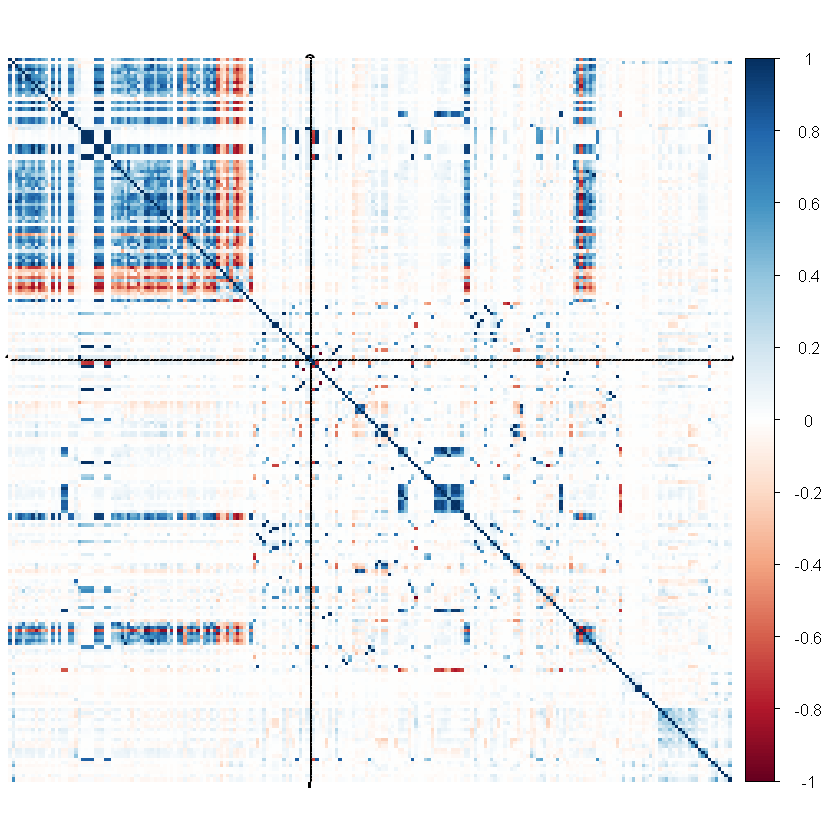

In [14]:
#Correlation Plot
cor <- suppressWarnings(cor(na.omit(data[,c(6:224)])))
corrplot(cor, tl.pos = "n", method = "color")

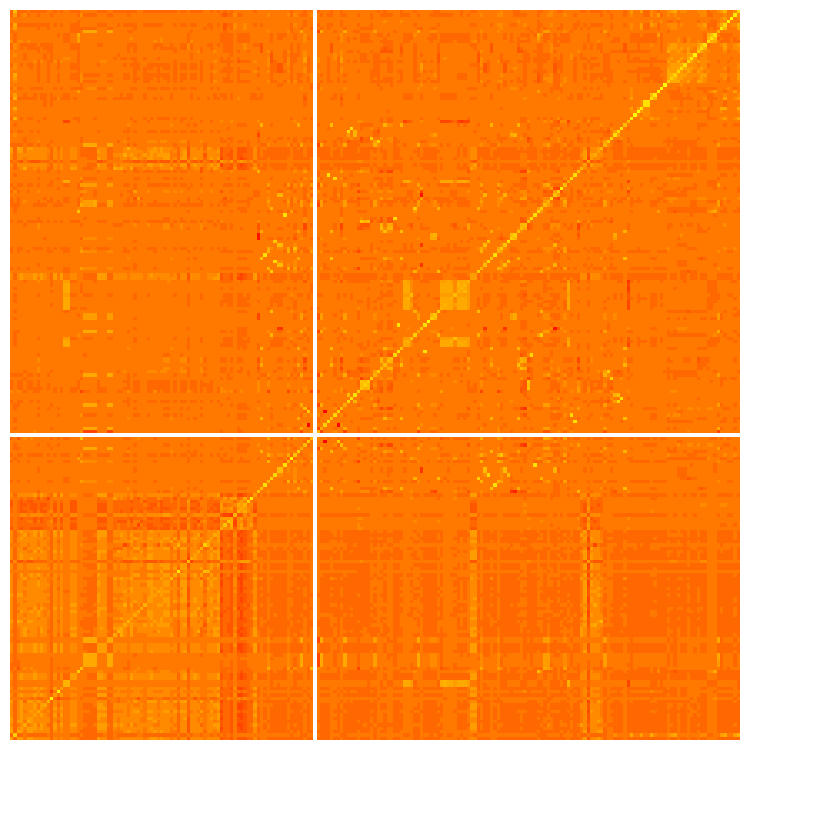

In [15]:
#Heat map of the correlation
colors <- colorRampPalette(c("red", "orange", "yellow")) (20)
heatmap(cor, Rowv = NA, Colv = NA, col = colors, labRow = FALSE, labCol = FALSE)

In [16]:
#Checking if any variables are highly correlated with the dependent variable 'nextYR_PRICE_VAR'
ML <- na.omit(data[,c(2,6:224)])
corr <- suppressWarnings(abs(round(cor(ML),4)))
corr <- (corr[, c(1)])
corr <- sort(corr, decreasing = TRUE)
corr

nextYR_PRICE_VAR 
                                    1.0000 
                            priceFairValue 
                                    0.3856 
                   companyEquityMultiplier 
                                    0.1260 
                            returnOnEquity 
                                    0.0773 
                                       ROE 
                                    0.0773 
                       Gross Profit Growth 
                                    0.0596 
                        Receivables growth 
                                    0.0523 
                      Free Cash Flow Yield 
                                    0.0502 
                              currentRatio 
                                    0.0499 
                             Current ratio 
                                    0.0499 
                         Net Income Growth 
                                    0.0484 
               Intangibles to Total Assets 
                                    0.0482 
       10Y Operating CF Growth (per Share) 
                                    0.0455 
                          Capex to Revenue 
                                    0.0442 
                             EBITDA Margin 
                                    0.0431 
                                ebtperEBIT 
                                    0.0431 
                                eBTperEBIT 
                                    0.0431 
              Capex to Operating Cash Flow 
                                    0.0405 
                             Profit Margin 
                                    0.0402 
                         Net Profit Margin 
                                    0.0402 
                           netProfitMargin 
                                    0.0402 
                               EBIT Margin 
                                    0.0399 
                            ebitperRevenue 
                                    0.0399 
                            eBITperRevenue 
                                    0.0399 
               operatingCashFlowSalesRatio 
                                    0.0393 
           Effect of forex changes on cash 
                                    0.0388 
                Earnings Before Tax Margin 
                                    0.0386 
                daysOfInventoryOutstanding 
                                    0.0378 
                    Days Sales Outstanding 
                                    0.0378 
                  Stock-based compensation 
                                    0.0377 
                Operating Cash Flow growth 
                                    0.0374 
                   enterpriseValueMultiple 
                                    0.0365 
        freeCashFlowOperatingCashFlowRatio 
                                    0.0364 
                 daysOfPayablesOutstanding 
                                    0.0356 
                 Days Payables Outstanding 
                                    0.0356 
  5Y Dividend per Share Growth (per Share) 
                                    0.0350 
             Issuance (buybacks) of shares 
                                    0.0349 
        5Y Operating CF Growth (per Share) 
                                    0.0328 
            10Y Revenue Growth (per Share) 
                                    0.0319 
                       Financing Cash Flow 
                                    0.0316 
                 EV to Operating cash flow 
                                    0.0313 
         10Y Net Income Growth (per Share) 
                                    0.0310 
                             assetTurnover 
                                    0.0305 
                 totalDebtToCapitalization 
                                    0.0302 
                     Free Cash Flow margin 
                                    0.0299 
            priceToOperatingCashFlowsRatio 
                      

In [17]:
#Checking if any variables are highly correlated with the dependent variable 'Class'
LT <- na.omit(data[,c(3,6:224)])
corr <- suppressWarnings(abs(round(cor(LT),4)))
corr <- (corr[, c(1)])
corr <- sort(corr, decreasing = TRUE)
corr

Class 
                                    1.0000 
           Effect of forex changes on cash 
                                    0.0782 
       10Y Operating CF Growth (per Share) 
                                    0.0767 
                              currentRatio 
                                    0.0710 
                             Current ratio 
                                    0.0710 
                       Gross Profit Growth 
                                    0.0710 
                            Revenue Growth 
                                    0.0695 
                              Gross Margin 
                                    0.0683 
                         grossProfitMargin 
                                    0.0675 
               Intangibles to Total Assets 
                                    0.0650 
  5Y Dividend per Share Growth (per Share) 
                                    0.0644 
                         Other Liabilities 
                                    0.0621 
 10Y Dividend per Share Growth (per Share) 
                                    0.0587 
            Weighted Average Shs Out (Dil) 
                                    0.0579 
  3Y Dividend per Share Growth (per Share) 
                                    0.0579 
                  Weighted Average Shs Out 
                                    0.0576 
                 EV to Operating cash flow 
                                    0.0569 
           Cash and short-term investments 
                                    0.0565 
            priceToOperatingCashFlowsRatio 
                                    0.0564 
                                POCF ratio 
                                    0.0564 
                               EV to Sales 
                                    0.0562 
              Capex to Operating Cash Flow 
                                    0.0550 
                         Dividend payments 
                                    0.0549 
                        priceCashFlowRatio 
                                    0.0547 
                        pretaxProfitMargin 
                                    0.0541 
                                Market Cap 
                                    0.0540 
                 Total current liabilities 
                                    0.0537 
                      Total current assets 
                                    0.0536 
                          Enterprise Value 
                                    0.0533 
                          Operating Income 
                                    0.0529 
                  Stock-based compensation 
                                    0.0521 
        freeCashFlowOperatingCashFlowRatio 
                                    0.0521 
                         Total liabilities 
                                    0.0517 
                         priceToSalesRatio 
                                    0.0502 
                      Price to Sales Ratio 
                                    0.0502 
                                      EBIT 
                                    0.0493 
                           priceSalesRatio 
                                    0.0492 
                    Short-term investments 
                                    0.0491 
                              Total assets 
                                    0.0491 
                          Deferred revenue 
                                    0.0489 
                       Earnings before Tax 
                                    0.0482 
                              Gross Profit 
                                    0.0476 
                       Operating Cash Flow 
                                    0.0475 
                                ebtperEBIT 
                                    0.0473 
                                eBTperEBIT 
                                    0.0473 
                        Receivables growth 
                                 

#### Outliers
##### Boxplot

  1. The majority of the variables have extreme outliers and a large percentage of outliers. This is evidenced by the many collapsed boxplots that are seen for individual variables.
  2. Outliers are present in this dataset. Outliers can be significant as they can distort predictions and affect the accuracy of models. To deal with them, I could remove the extreme outliers, use imputation to assign a non-extreme value, or implement a cap that would replace observations outside a certain extreme.

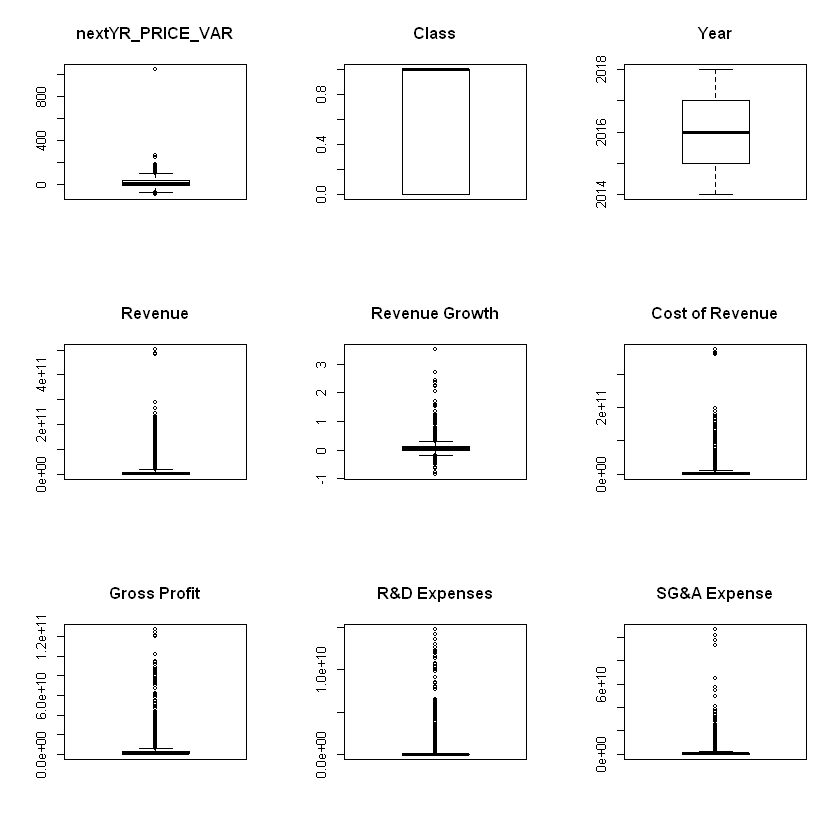

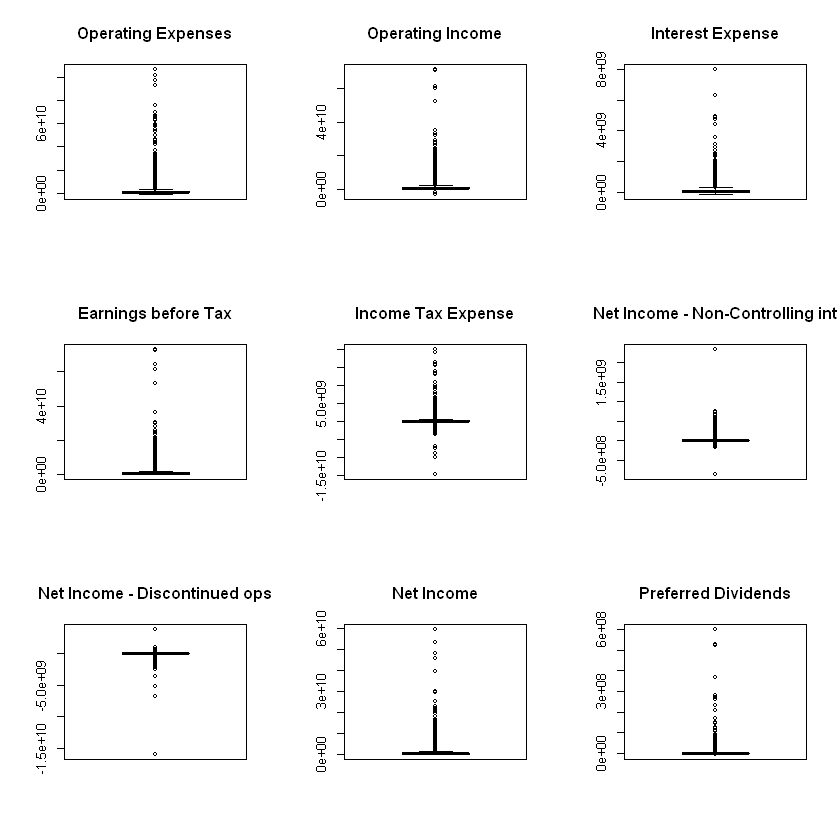

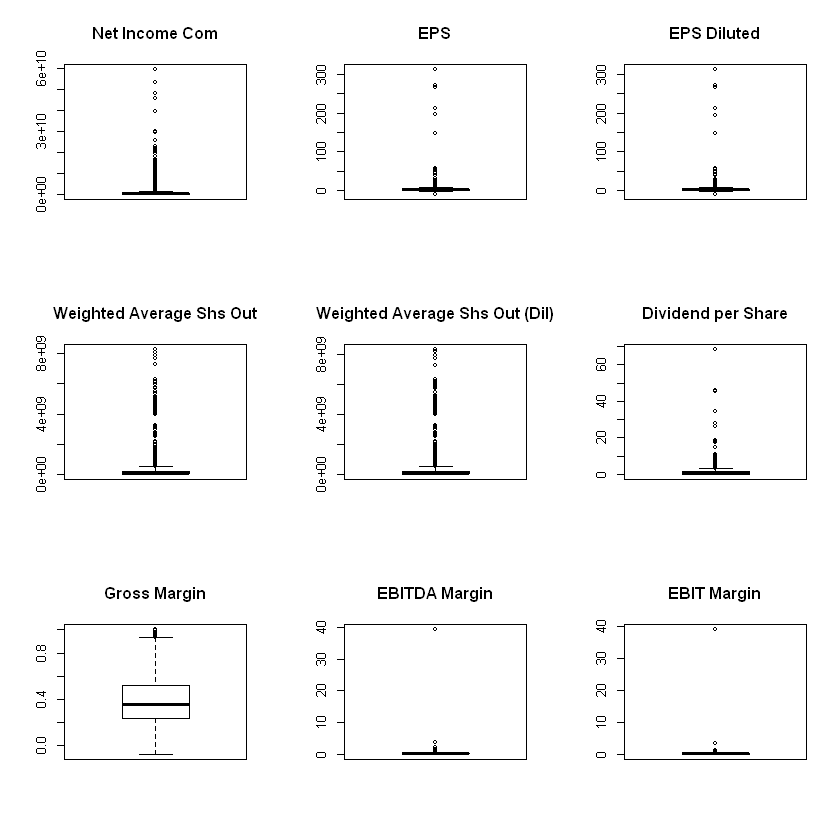

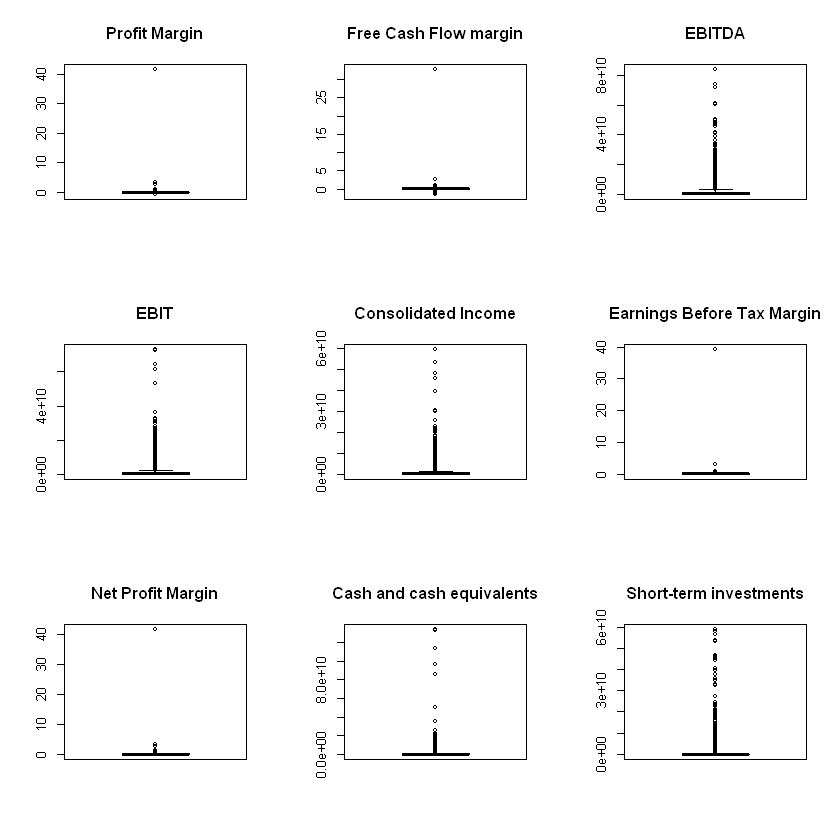

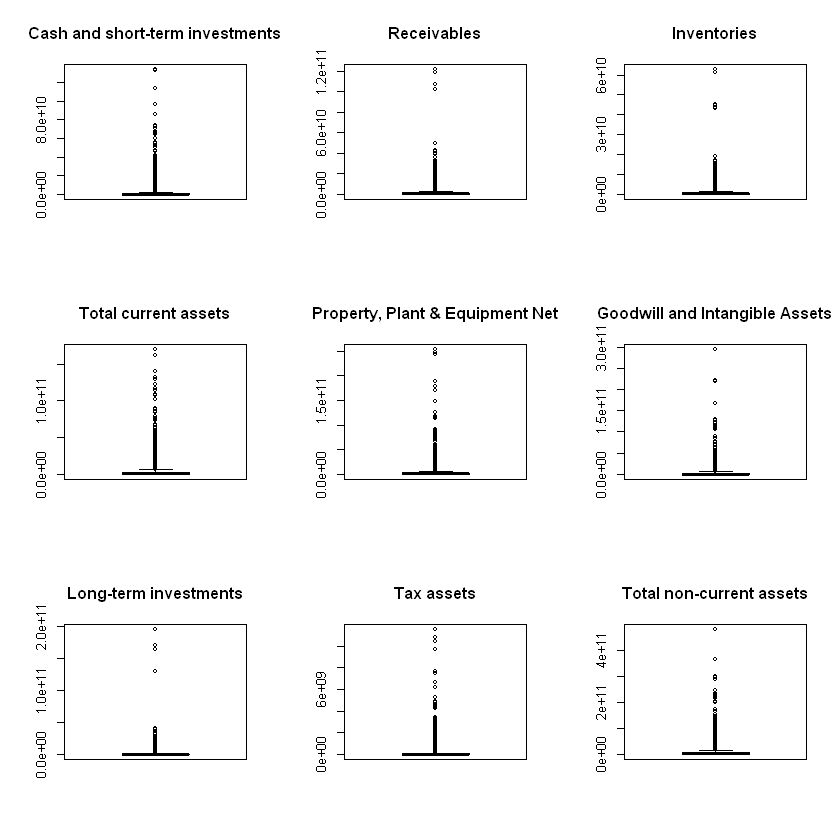

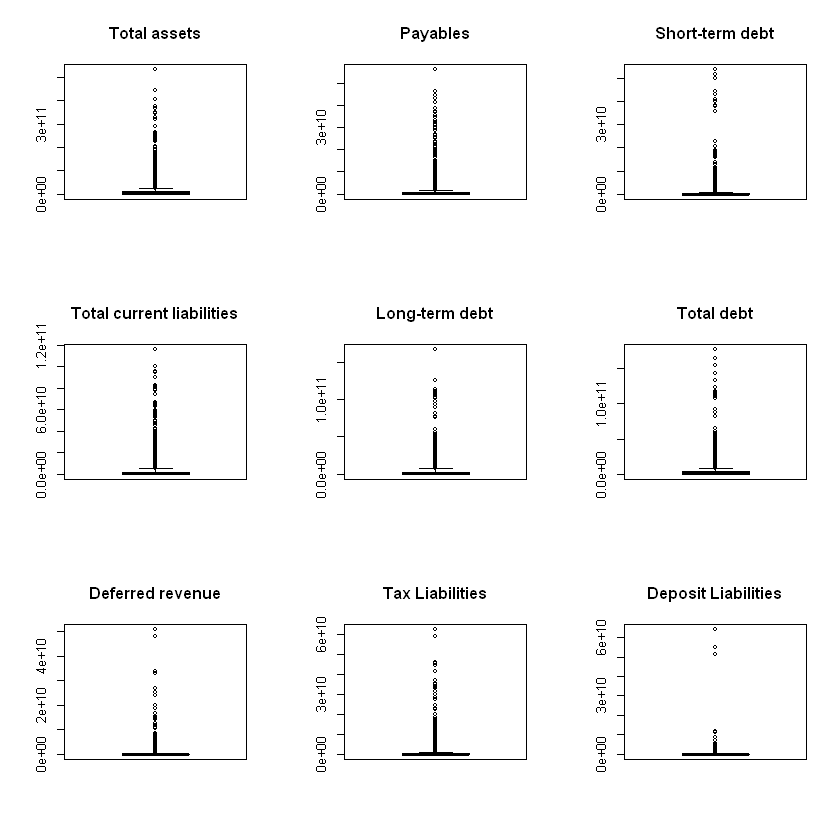

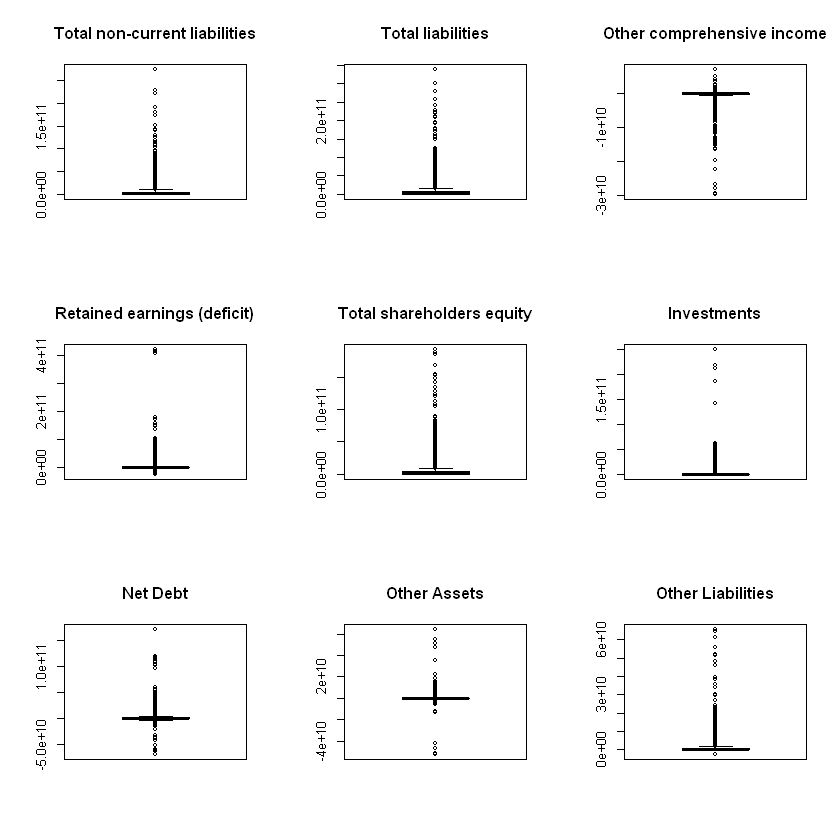

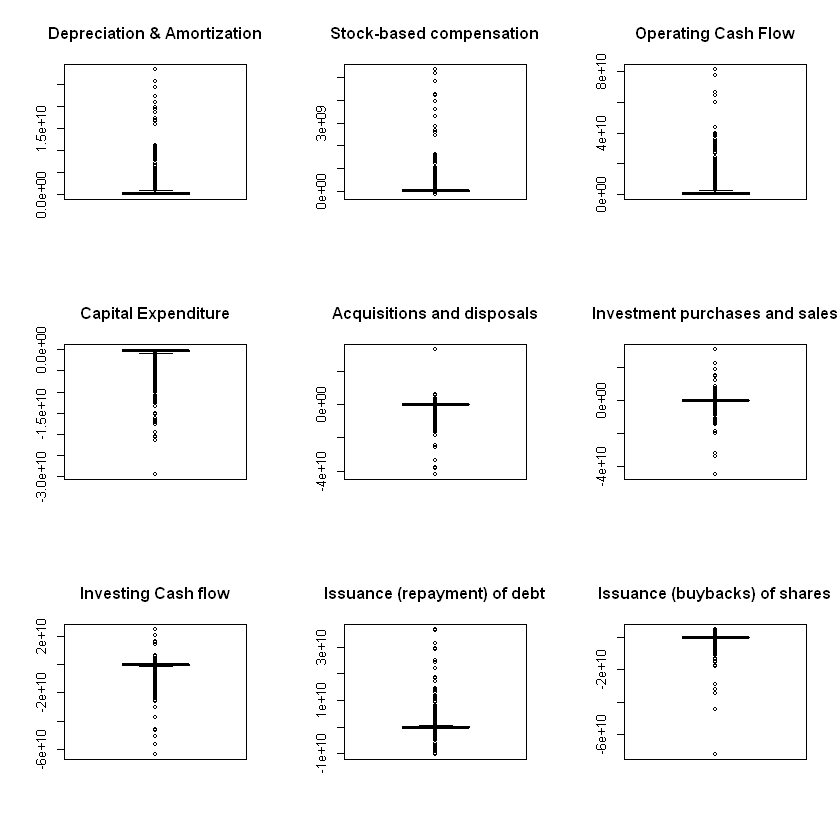

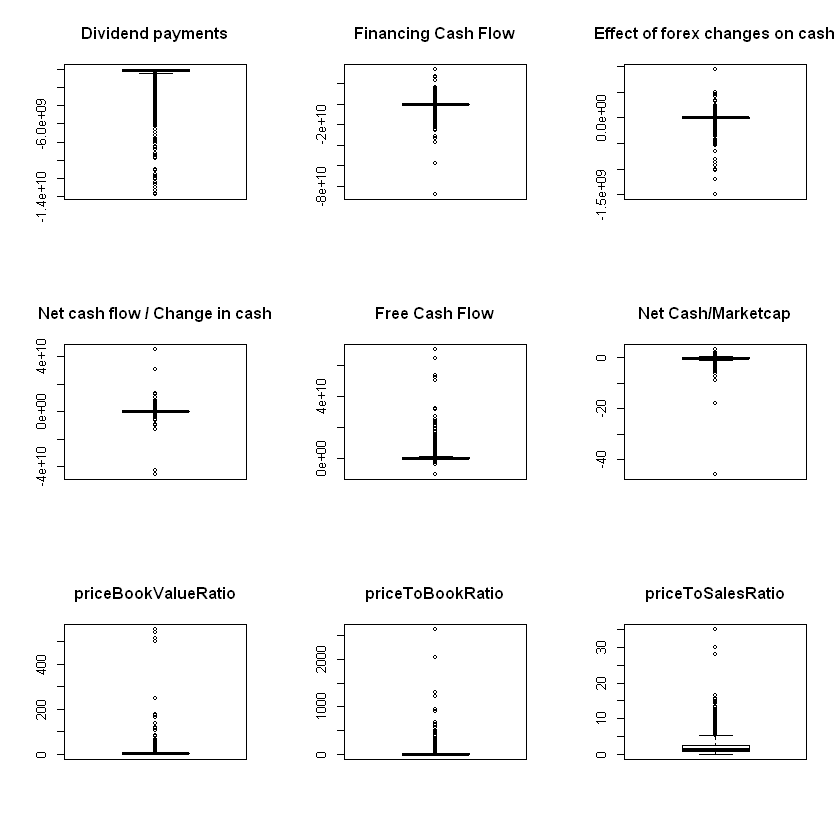

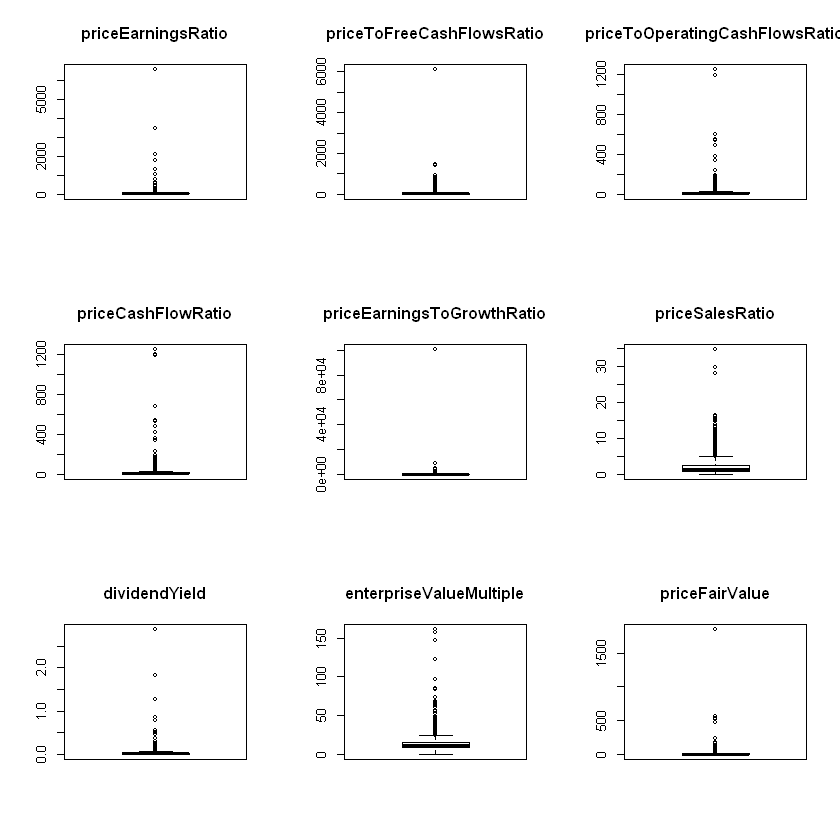

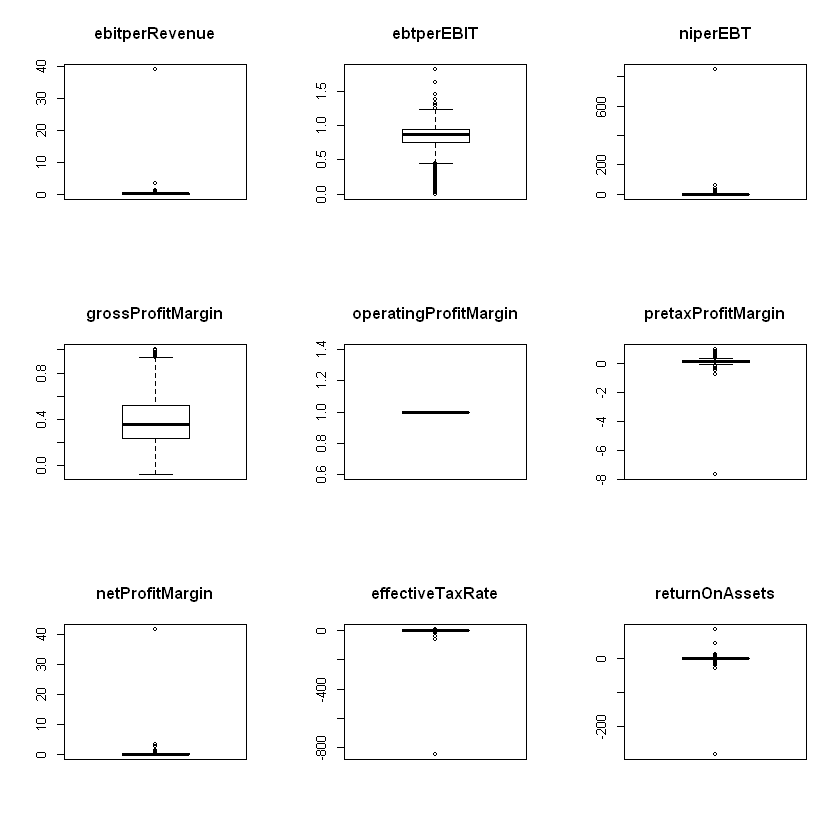

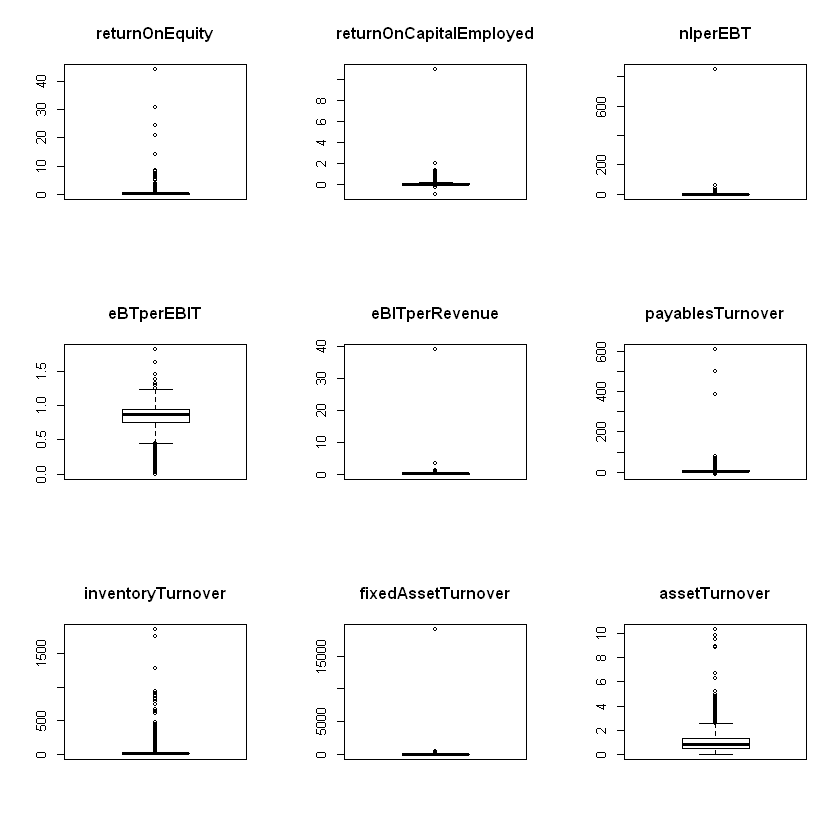

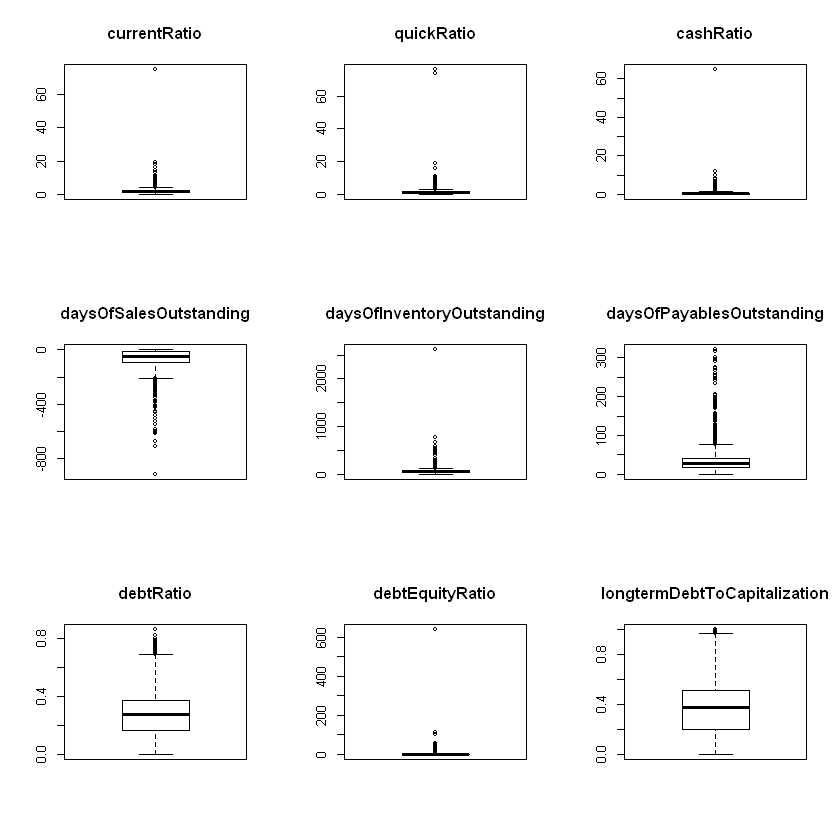

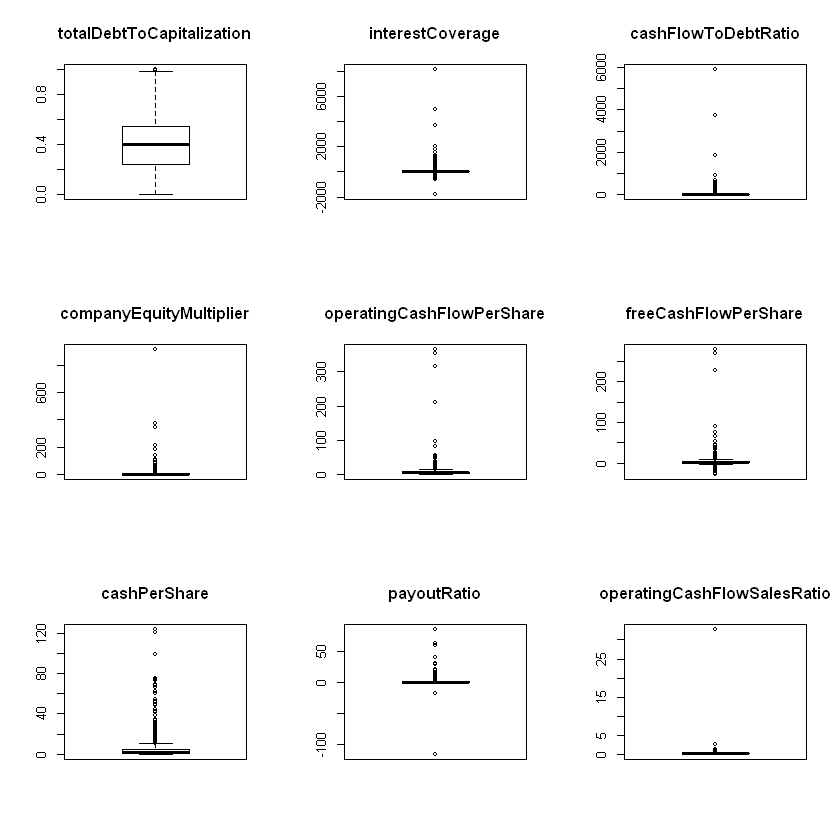

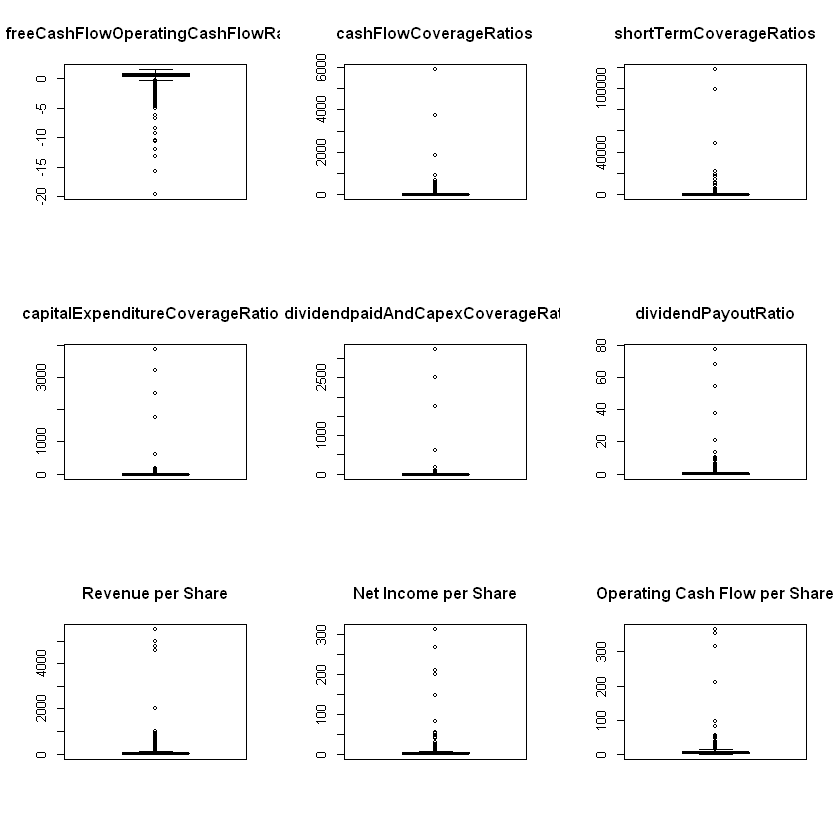

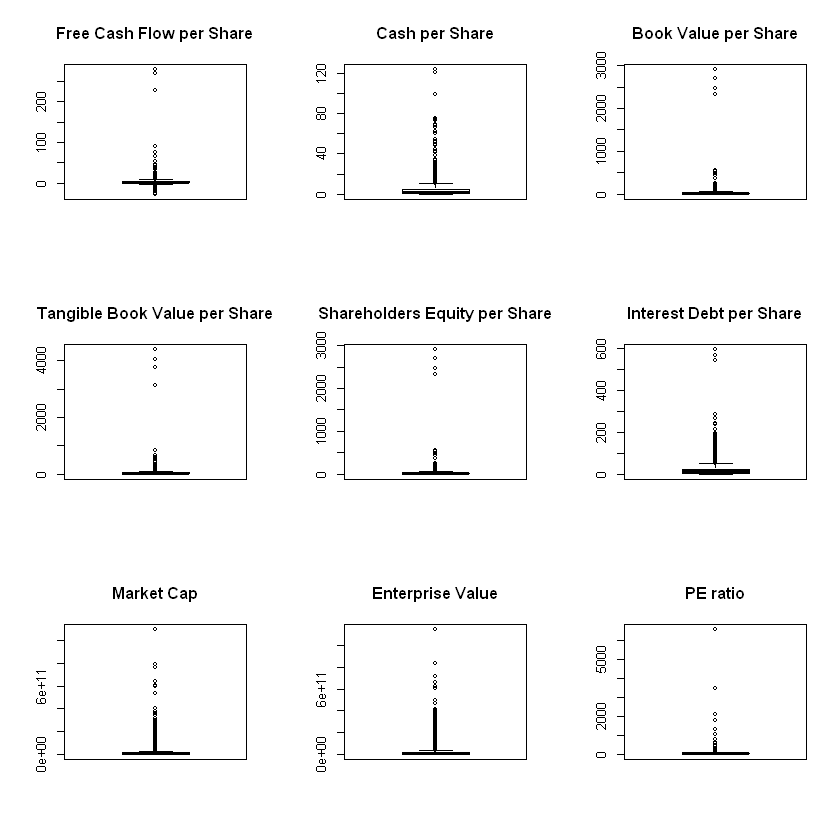

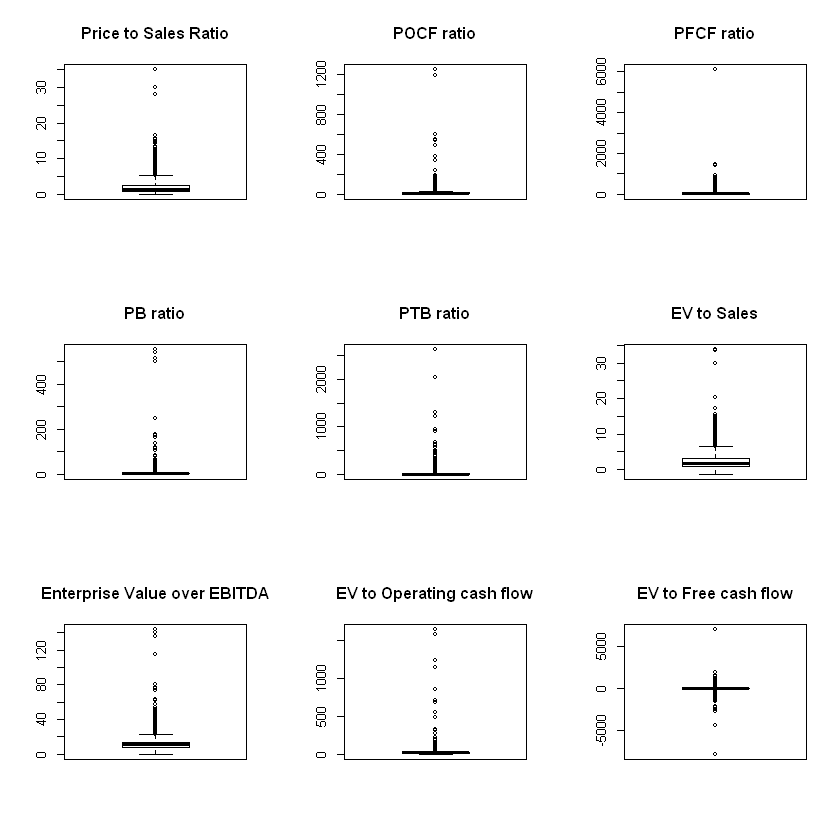

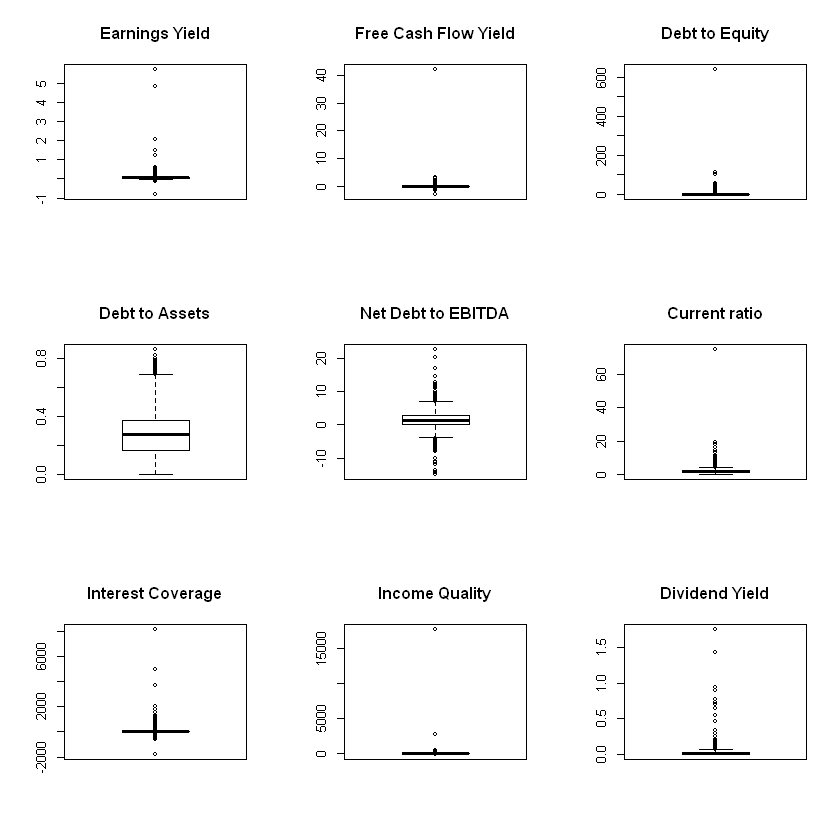

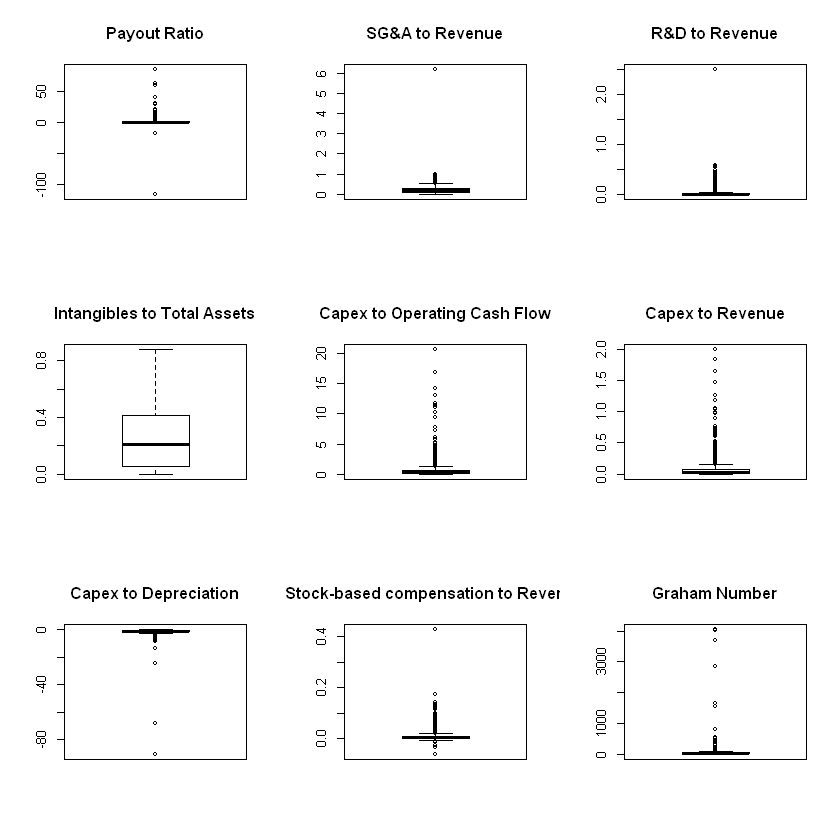

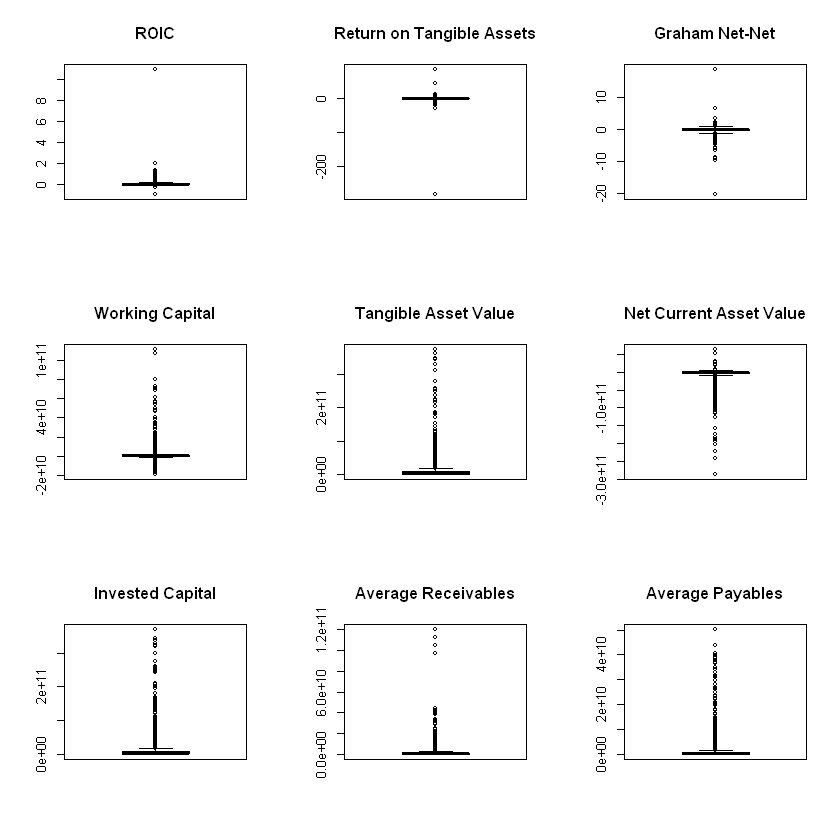

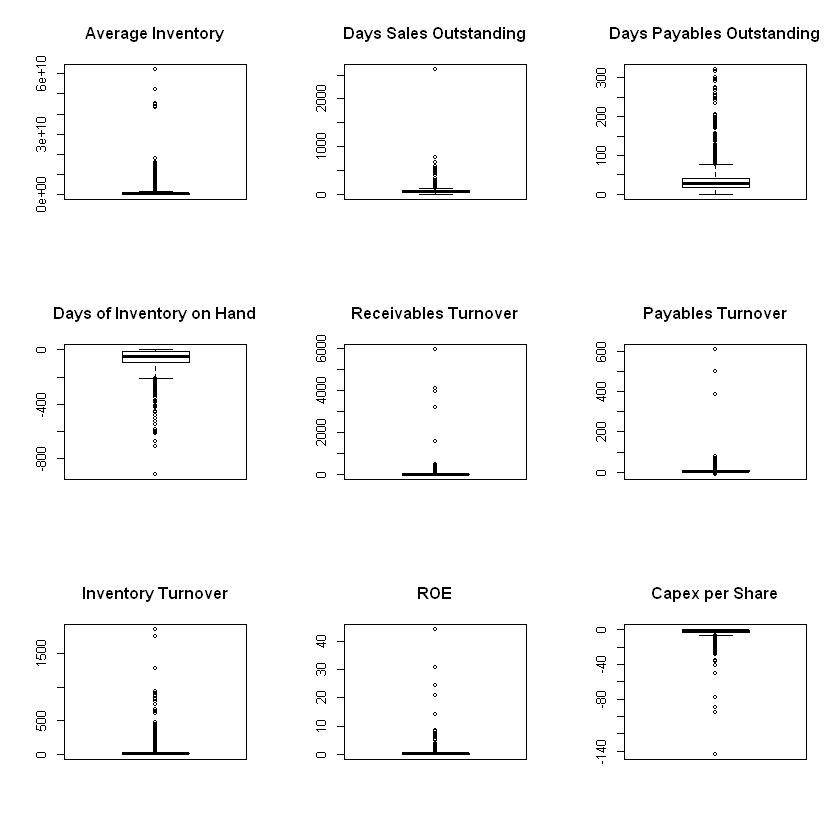

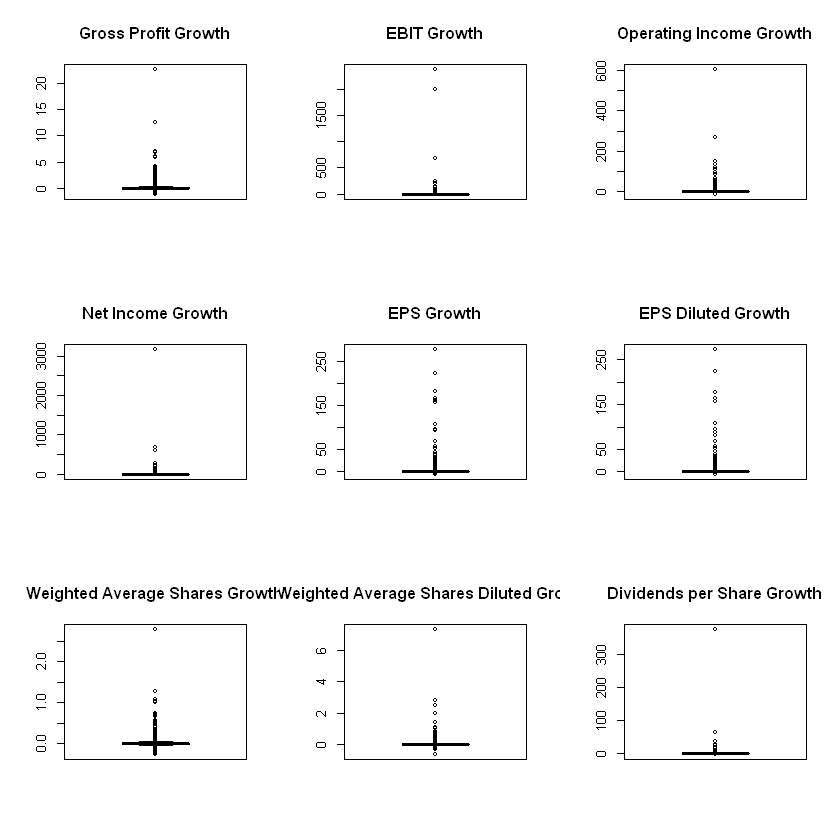

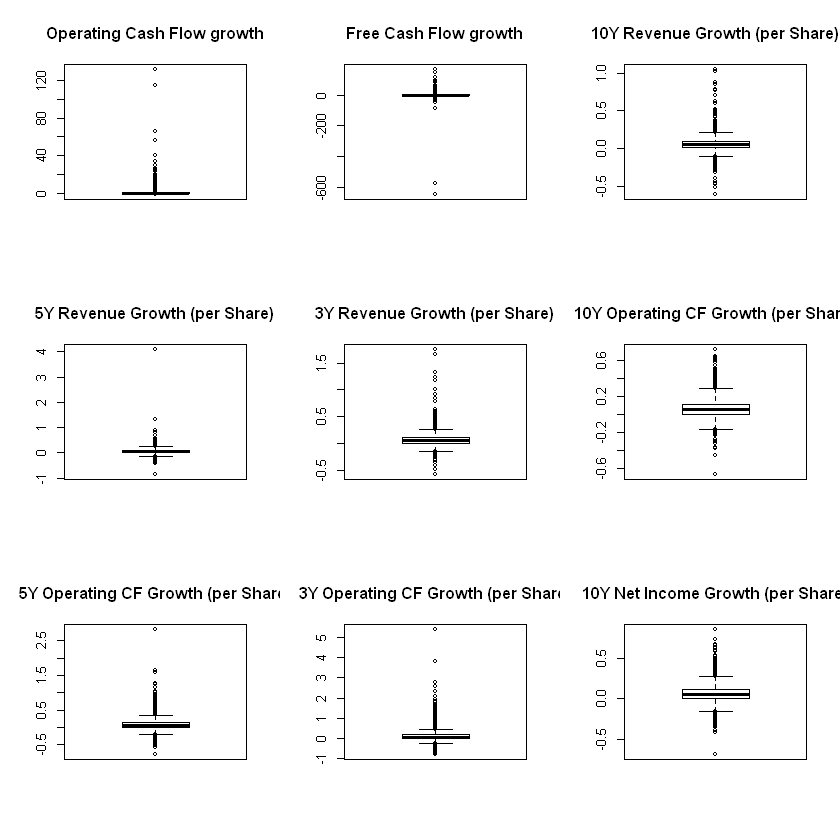

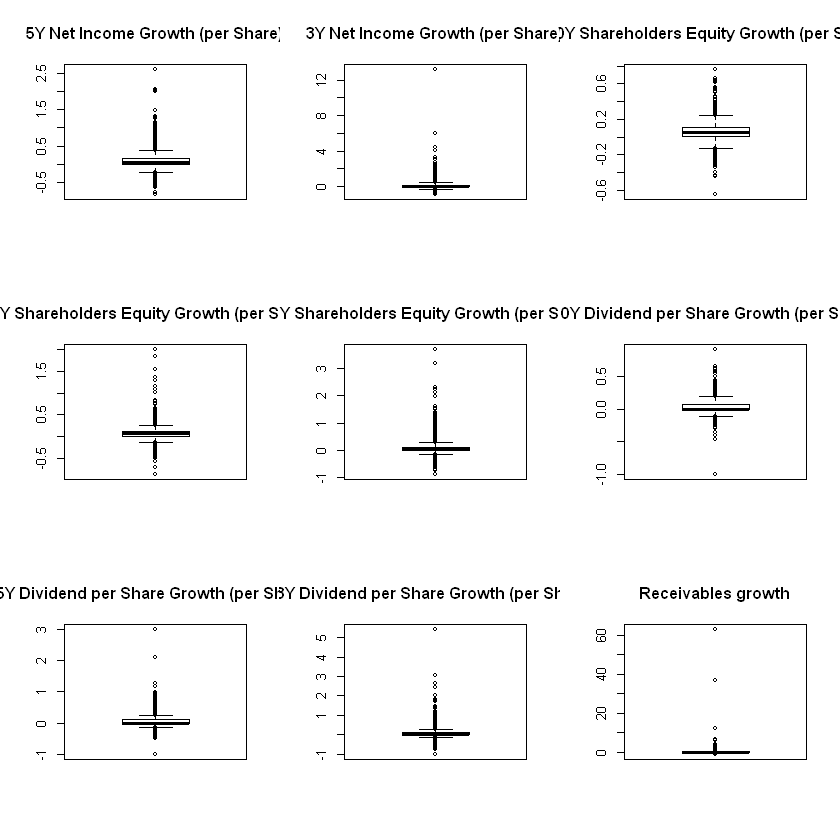

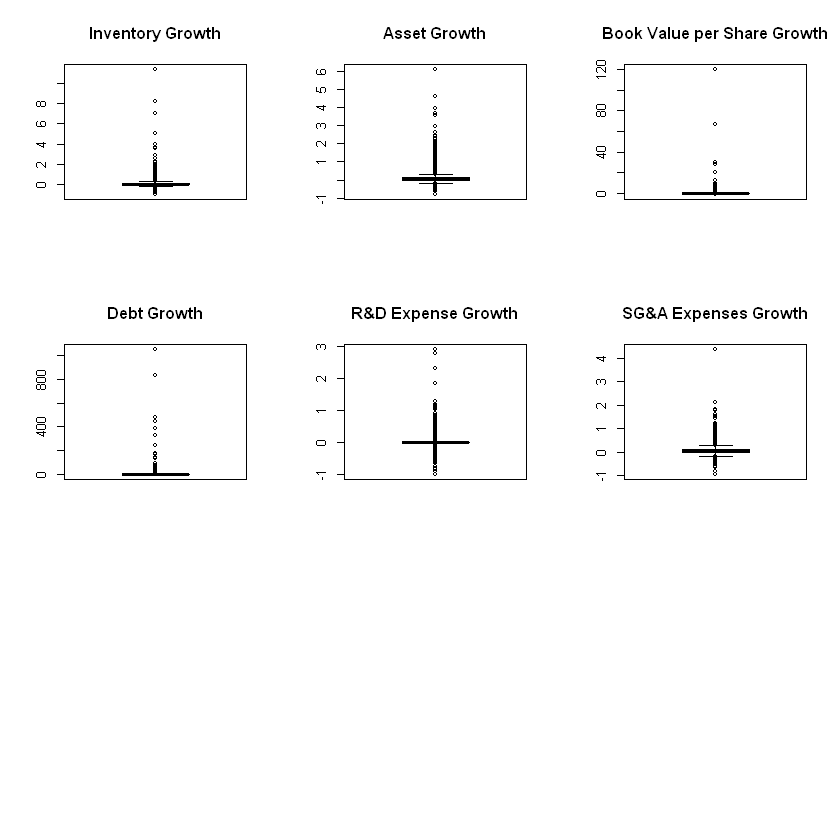

In [18]:
#Changing the plot to a 3 by 3 layout
par(mfrow=c(3,3))

df <- as.data.frame(data)
df <- na.omit(Filter(is.numeric, data))

for (i in colnames(df)) {
  x <- dplyr::pull(df,i)
  boxplot(x, main=i)}

##### Z_scores

  1. The default z score function is not reliable if the data set does not follow a normal distribution. There is a good chance that a data set with a large number of outliers does not follow a normal distribution. This is supported by the histograms that were created in the distribution section.
  2. For z scores, I normally use +-3 standard deviations as the cut off for an outlier. In this data set, when applying this cut off I found that less than 8000 out of 750,000 of the observations were outside this cut off.
  3. The same techniques as mentioned above in the boxplot section may need to be applied to outliers.
  
Cook's Distance: This technique was utilized to get a better look at how the outliers may affect the results of the model. From the graph below, there are only a few outliers that could potentially influence a model. Those rows that were found to have potentially influential data points were removed from the dataset.

In [19]:
z <- scores(df, type = "z")
# NOTE: The following code has been commmented out due to the length of its output.
#summary(z)
#This will give us the max and min so that we can see the extremes of the z scores for each variable
t(apply(z,2,range))

nextYR_PRICE_VAR,-2.6674096,26.6024826
Class,-1.2687226,0.7879626
Year,-1.6089718,1.3005660
Revenue,-0.3464763,16.9229970
Revenue Growth,-4.4878019,16.5592023
Cost of Revenue,-0.3039769,17.2254268
Gross Profit,-0.3578326,12.3524392
R&D Expenses,-0.1944744,12.4822786
SG&A Expense,-0.3066502,19.4376261
Operating Expenses,-0.4699909,15.0611052
Operating Income,-1.1476498,18.3478030


In [20]:
#This will give us the number of observations that are inside/outside of the cutoff of +-3
outliers <- abs(z) > 3
table(outliers)  #Outliers = True

outliers
 FALSE   TRUE 
744025   7596 

##### Cook's Distance

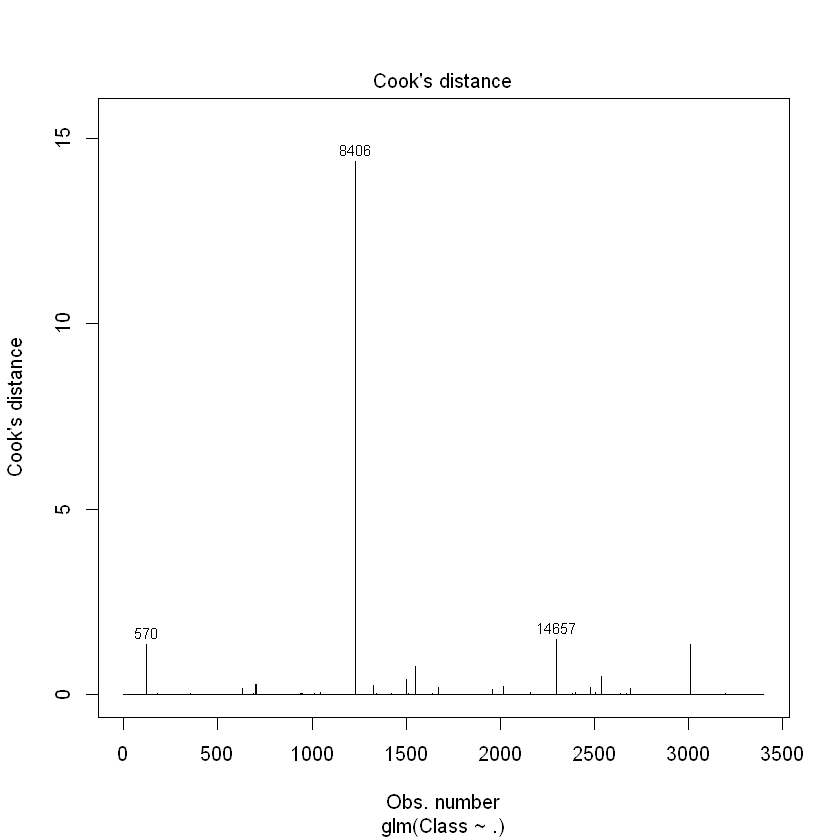

In [21]:
#Cook's Distance
cooks <- data[, -c('Stock','nextYR_PRICE_VAR','Sector')]
cooks[, Class := as.factor(Class)]
glm <- suppressWarnings(glm(Class~., family = "binomial", data = cooks))

#Cook's Distance Plots 
plot(glm, which = 4, id.n = 3)

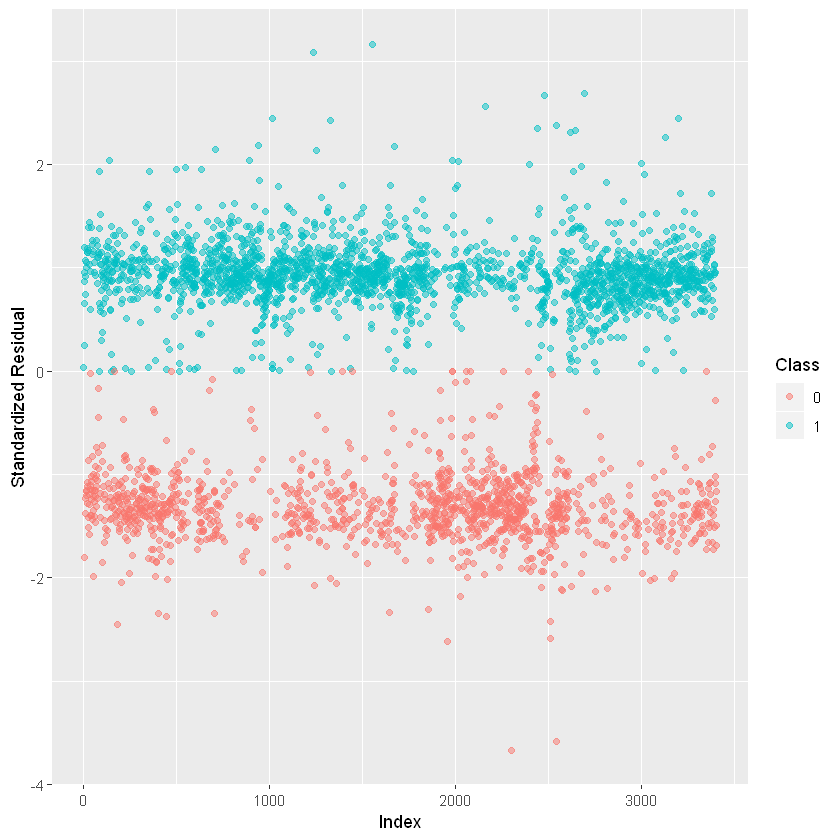

In [22]:
#Plot the standardized residuals
model.data <- augment(glm) %>%
  mutate(index = 1:n())
ggplot(model.data, aes(index, .std.resid)) + 
    geom_point(aes(color = Class), alpha = .5) + 
    theme(plot.title = element_text(hjust = 0.5)) + 
    labs(x="Index", y="Standardized Residual"
         , color="Class")

In [23]:
#Remove potential influential points
dim(data)
rows_to_remove <- model.data %>% 
  dplyr::filter(abs(.std.resid) > 3)

rows_to_remove <- rows_to_remove$.rownames
rows_to_remove

data <- data %>%
  dplyr::mutate(row = row_number()) %>%
  dplyr::filter(!(row %in% rows_to_remove)) %>%
  dplyr::select(-c('row')) %>%
  setDT()

dim(data)

[1] 22077   224

[1] "8406"  "9800"  "14657" "17207"

[1] 22073   224

#### Variance
  1. Looking at the coefficient of variation (CV), there are 20 variables that have low variation. Low variation has been defined as a CV that is less than 1. 
  2. Each variable that had a variance of zero was removed from the data.

In [24]:
df <- na.omit(Filter(is.numeric, data))

min <- apply(df, 2, min)
max <- apply(df, 2, max)
mean <- apply(df, 2, mean)
var <- apply(df, 2, var)
sd <- apply(df, 2, sd)
quant <- apply(df, 2, quantile)
cv <- apply(df, 2, cv) #coefficient of variation of less than 1 is low

table(cv < 1, cv > 1)
  
rows <- c("min", "max", "mean", "var", "sd", "0%", "25%", "50%", "75%", "100%", "cv")
var_table <- rbind(t(min), t(max),t(mean), t(var), t(sd), quant, t(cv))
rownames(var_table) = rows
var_table
fwrite(as.data.frame(var_table), paste0(dir$final_data,'summary_stats.csv'), row.names = TRUE)

       
        FALSE TRUE
  FALSE     0  202
  TRUE     20    0

,nextYR_PRICE_VAR,Class,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
min,-92.475423,0.0000000,2014.0000000,1.810437e+06,-0.83500000,0.000000e+00,-1.123200e+07,0.000000e+00,0.000000e+00,-9.357000e+08,...,-1.00000000,-1.00000000,-1.00000000,-1.0000000,-1.00000000,-0.78930000,-0.9820000,-0.999600,-1.00000000,-0.92640000
max,1041.666647,1.0000000,2018.0000000,5.003430e+11,3.50190000,3.733960e+11,1.269470e+11,1.472600e+10,1.065100e+11,1.065100e+11,...,0.91280000,2.98110000,5.40050000,62.7745000,11.37280000,6.10590000,119.6667000,1051.376600,2.89380000,4.35110000
mean,10.892951,0.6170150,2016.2116573,1.002854e+10,0.08985961,6.474938e+09,3.551608e+09,2.234111e+08,1.649190e+09,2.308700e+09,...,0.01022423,0.04141825,0.04745508,0.1368656,0.07455261,0.11628078,0.2252963,1.816946,0.02777380,0.07486565
var,1502.753725,0.2363771,1.8918782,8.392947e+20,0.04249776,4.541843e+20,9.929034e+19,1.328091e+18,2.902141e+19,4.767851e+19,...,0.04089456,0.04392084,0.07016874,1.7155522,0.15306855,0.09924346,6.4072848,789.098729,0.02573896,0.03473658
sd,38.765368,0.4861863,1.3754556,2.897058e+10,0.20614984,2.131160e+10,9.964454e+09,1.152428e+09,5.387152e+09,6.904963e+09,...,0.20222402,0.20957300,0.26489383,1.3097909,0.39123976,0.31502929,2.5312615,28.090901,0.16043366,0.18637751
0%,-92.475423,0.0000000,2014.0000000,1.810437e+06,-0.83500000,0.000000e+00,-1.123200e+07,0.000000e+00,0.000000e+00,-9.357000e+08,...,-1.00000000,-1.00000000,-1.00000000,-1.0000000,-1.00000000,-0.78930000,-0.9820000,-0.999600,-1.00000000,-0.92640000
25%,-11.788616,0.0000000,2015.0000000,7.962100e+08,0.00470000,4.098400e+08,2.449000e+08,0.000000e+00,8.464700e+07,1.493370e+08,...,0.00000000,0.00000000,0.00000000,-0.0300000,-0.01200000,-0.00120000,0.0082000,-0.079300,0.00000000,0.00000000
50%,9.214502,1.0000000,2016.0000000,2.367853e+09,0.05910000,1.291506e+09,8.086000e+08,0.000000e+00,3.109210e+08,4.766960e+08,...,0.00000000,0.00000000,0.00020000,0.0599000,0.01430000,0.04940000,0.0688000,0.010300,0.00000000,0.04570000
75%,30.820643,1.0000000,2017.0000000,7.724771e+09,0.12790000,4.727813e+09,2.541000e+09,8.748000e+06,1.046440e+09,1.502538e+09,...,0.07650000,0.09860000,0.10060000,0.1738000,0.11890000,0.12500000,0.1489000,0.191800,0.00000000,0.11790000
100%,1041.666647,1.0000000,2018.0000000,5.003430e+11,3.50190000,3.733960e+11,1.269470e+11,1.472600e+10,1.065100e+11,1.065100e+11,...,0.91280000,2.98110000,5.40050000,62.7745000,11.37280000,6.10590000,119.6667000,1051.376600,2.89380000,4.35110000


##### Zero Variance Columns

In [25]:
# Removing zero variance columns
nearZero <- nearZeroVar(data)
if(length(nearZero) > 0) data <- dplyr::select(data, -c(nearZero))
dim(data)

[1] 22073   219

In [26]:
length(nearZero)

[1] 5

#### Distributions
  1. The majority of the variables do not feature a normal distribution. 
  2. The target variable of "nextYR_PRICE_VAR" seems to have a near normal distribution. At first it didn't seem to, but increasing the number of breaks in the histogram showed that the initial assumption was incorrect. The target variable of "Class" does not have a normal distribution since it is a binary variable and thus can only have on of two values (0 or 1). Despite this, I have graphed it as a histogram below as well.
  3. Since the variables are not normally distributed, it is important to use acceptable modeling techniques so that the models that are deployed do not have underlying assumptions that the data is normally distributed. In some cases, data can also be converted so that it has a normal distribution prior to the model training stage.        

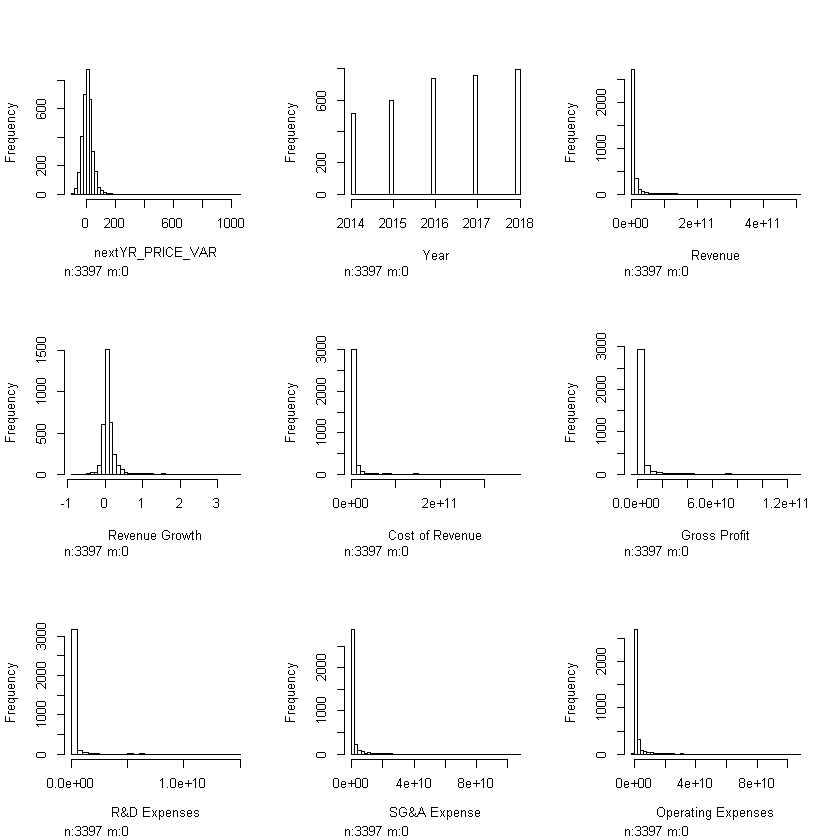

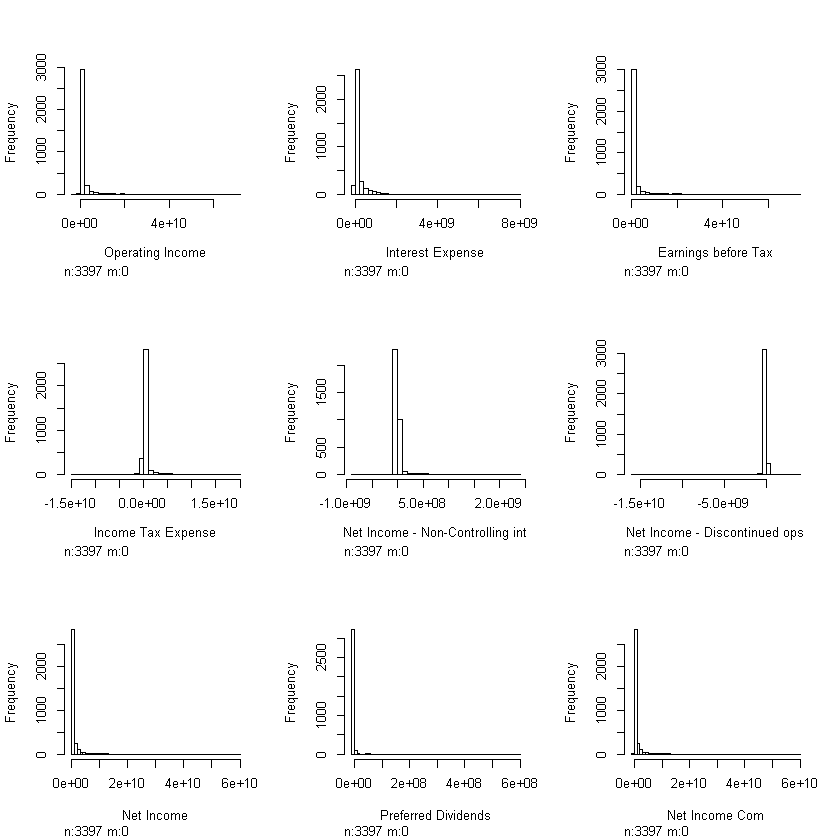

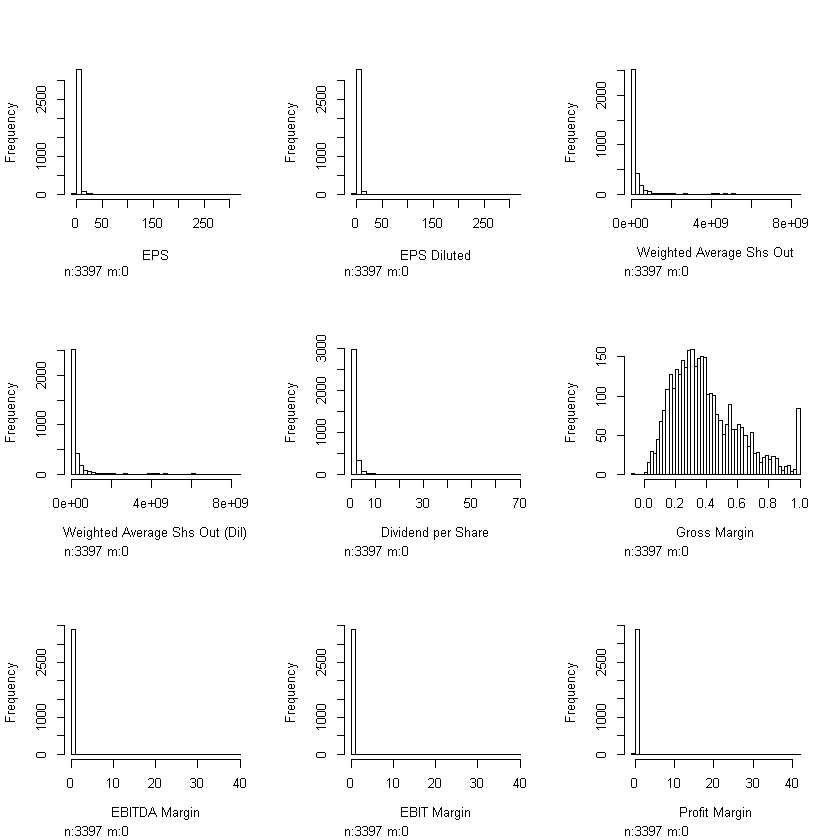

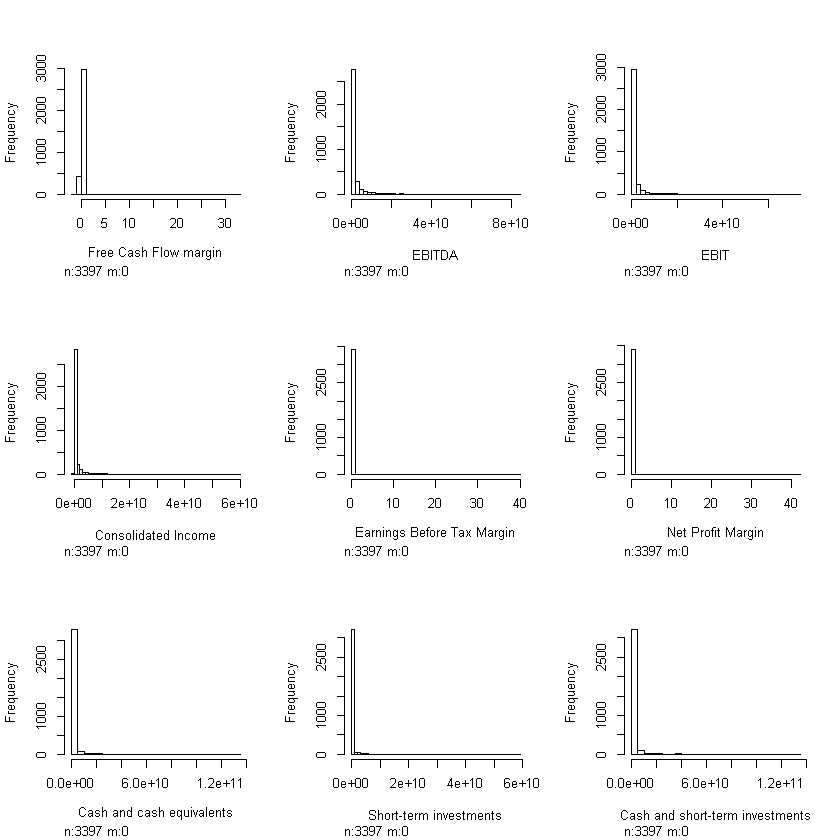

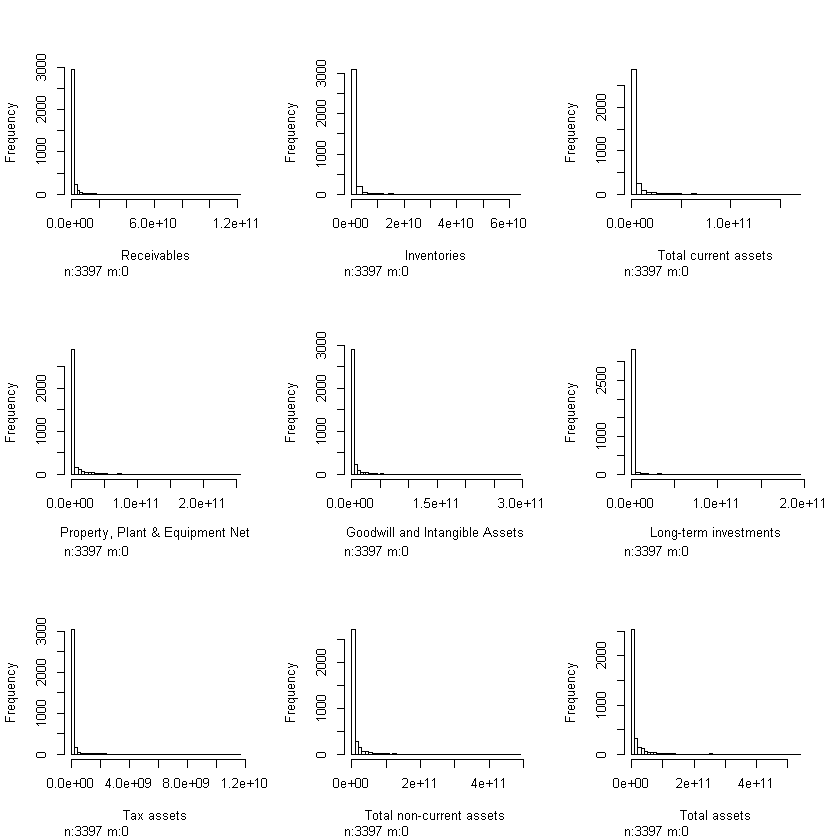

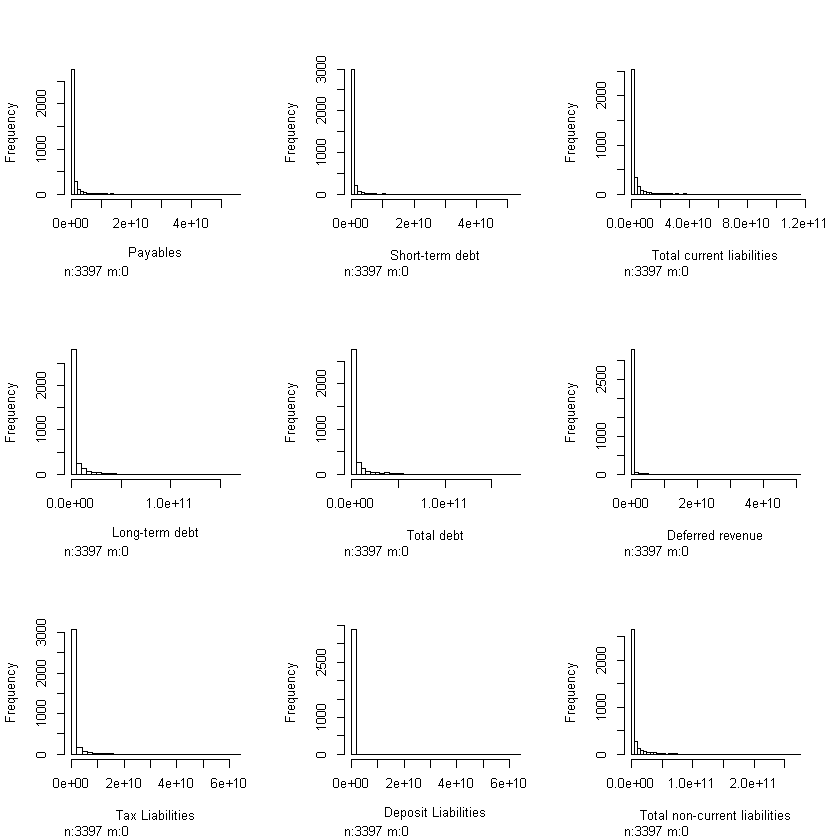

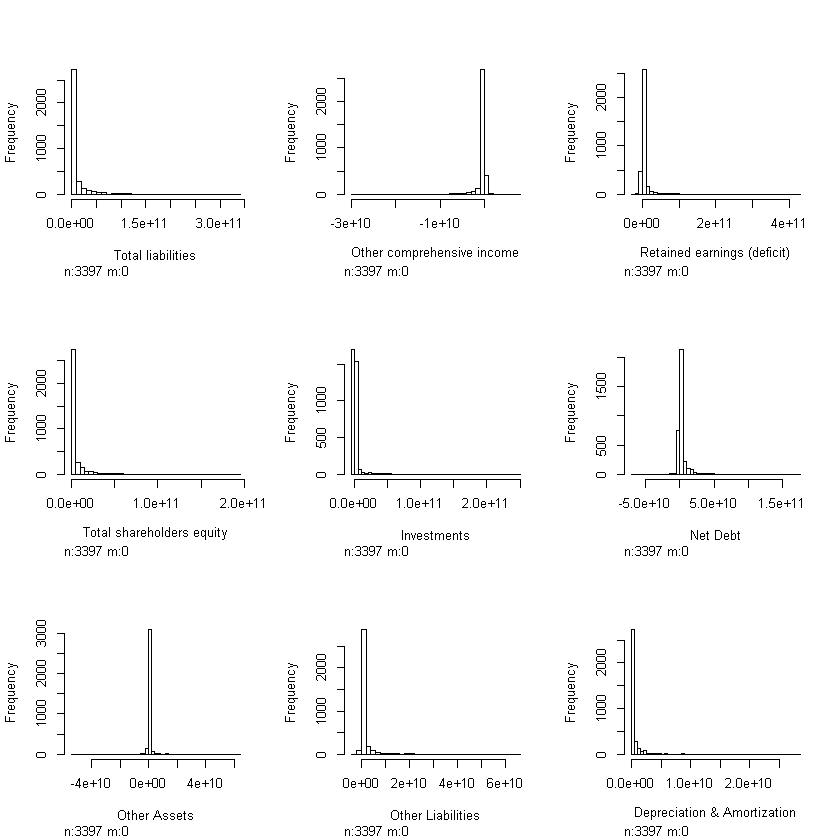

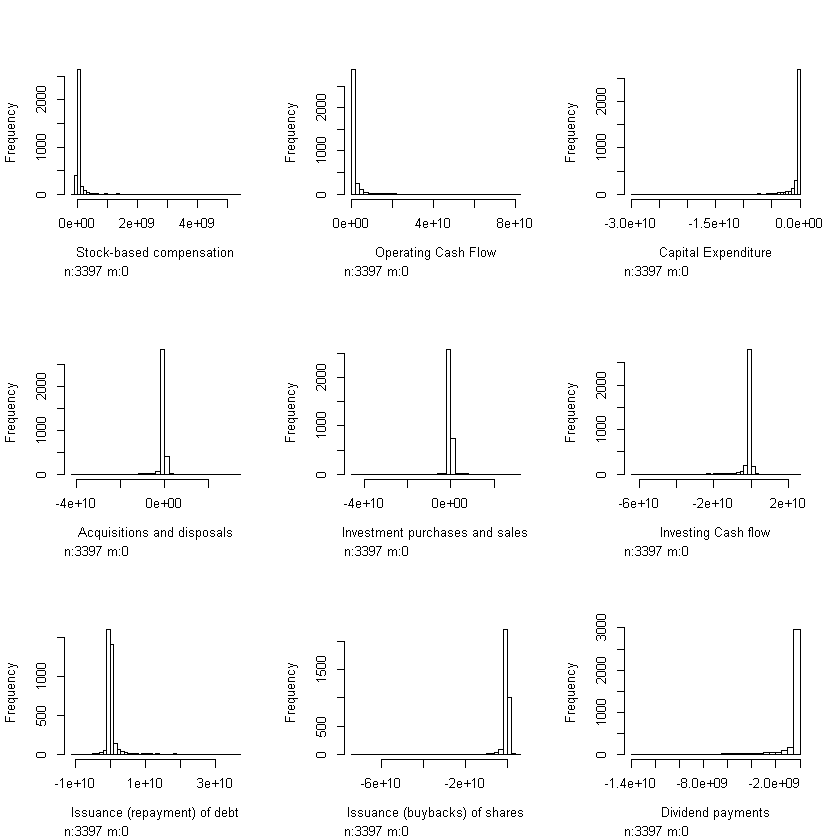

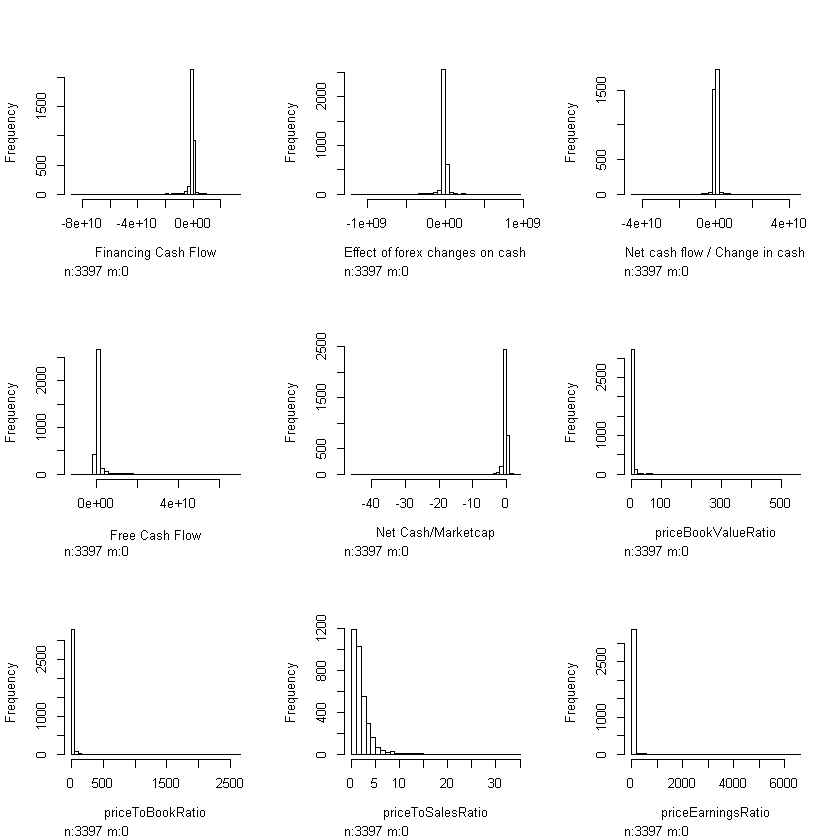

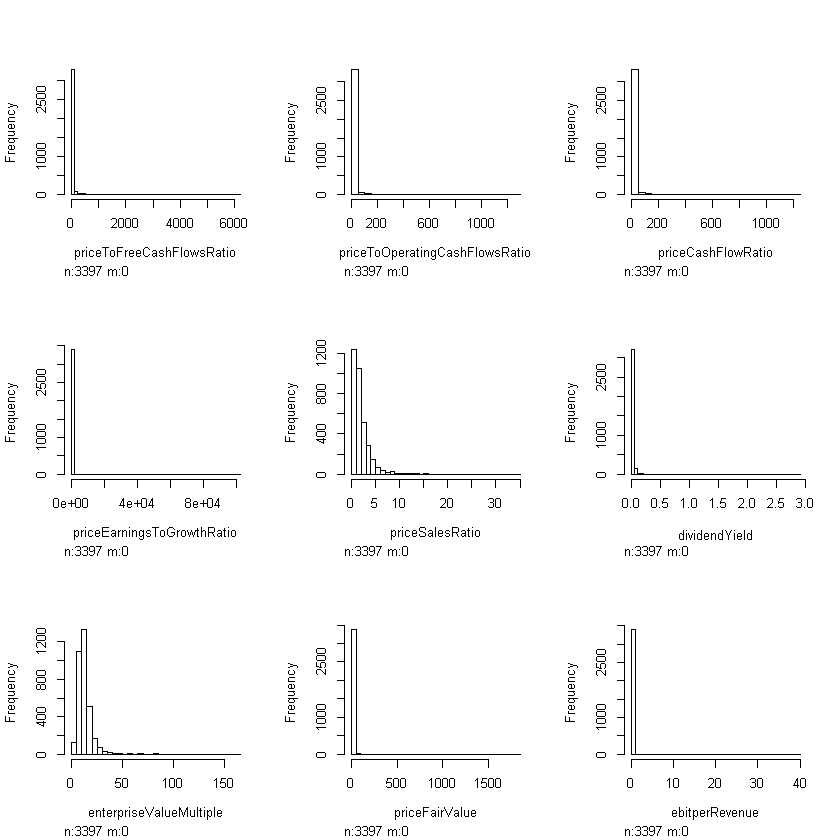

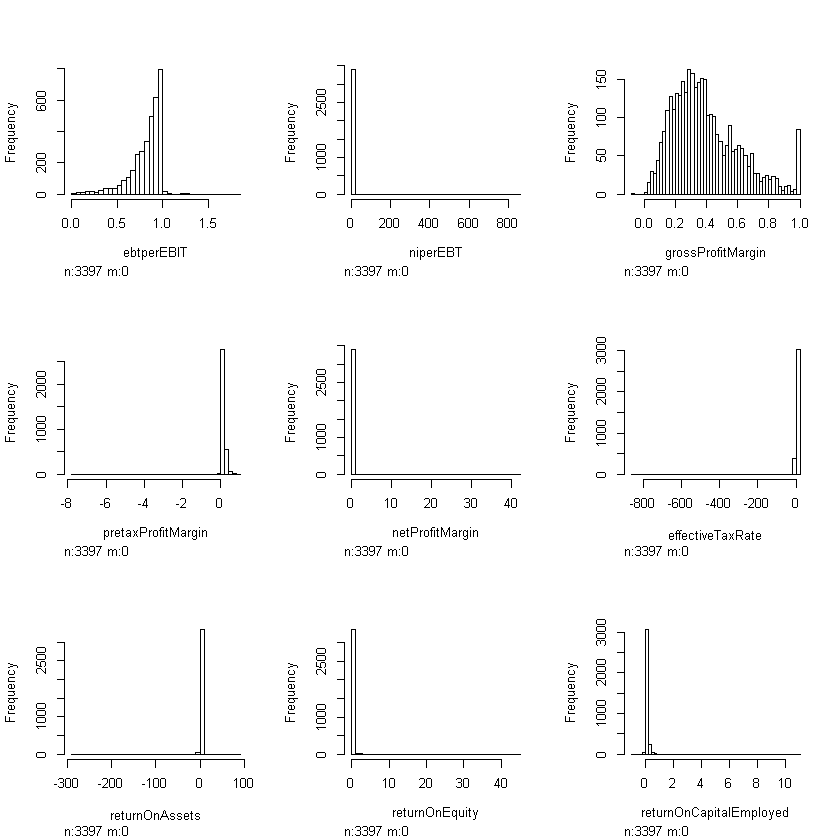

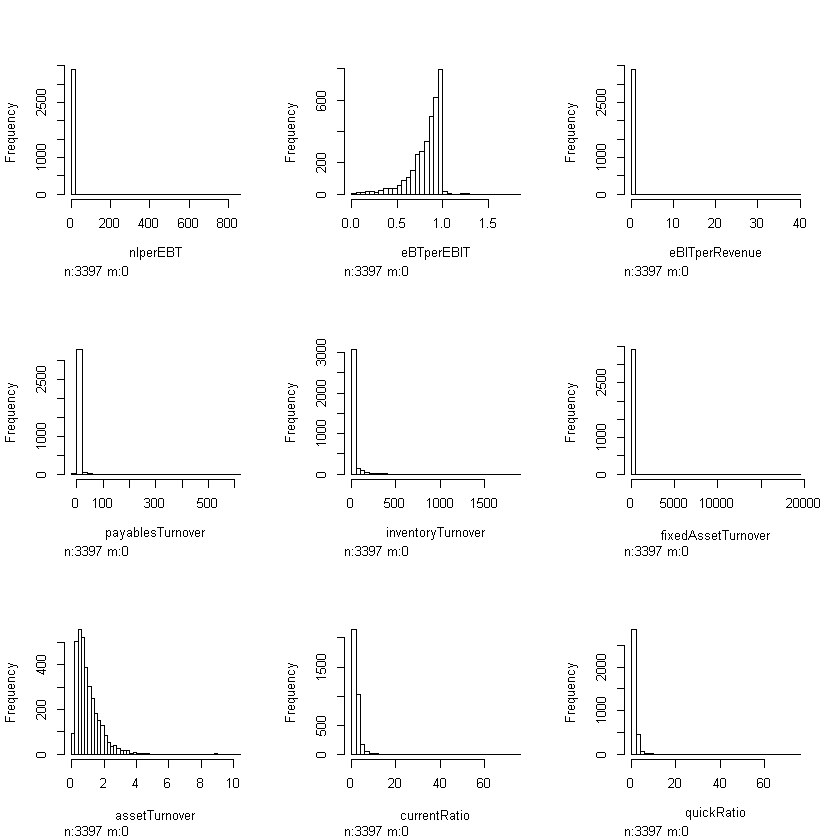

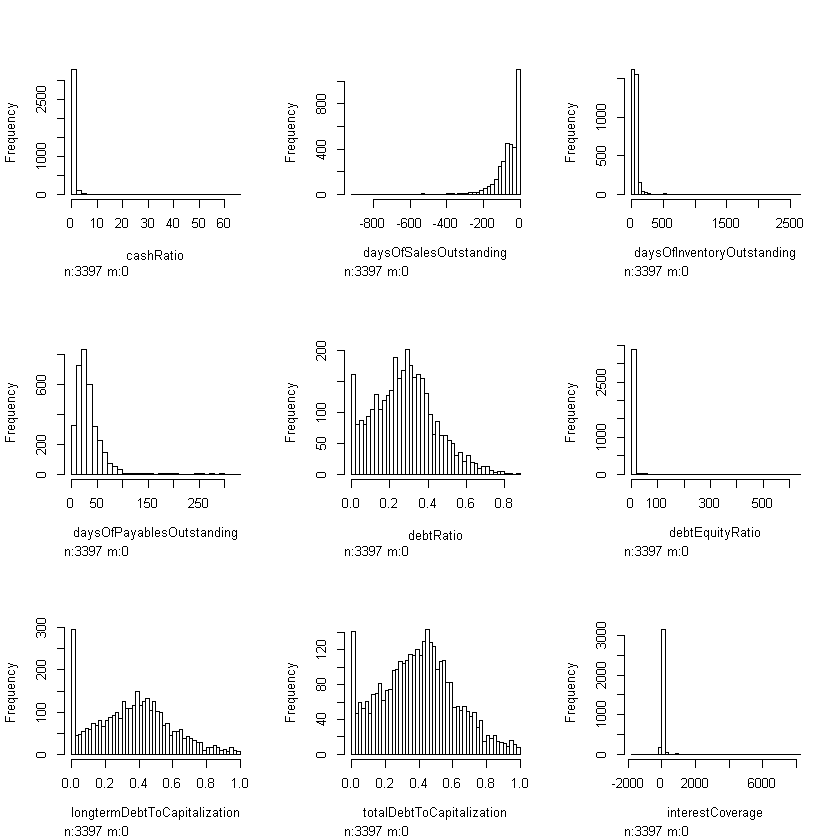

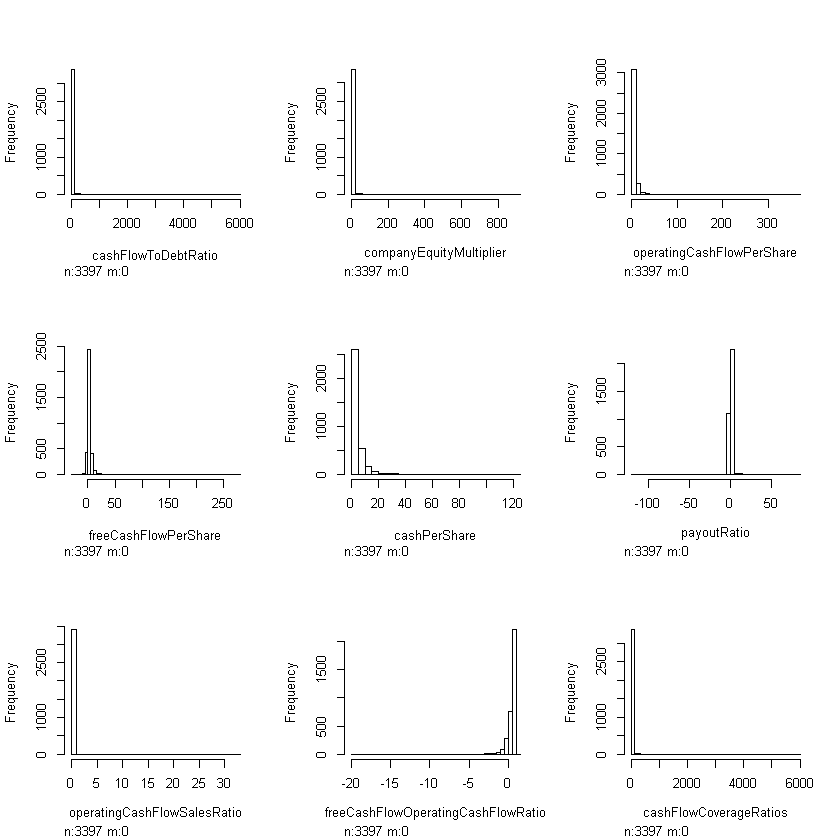

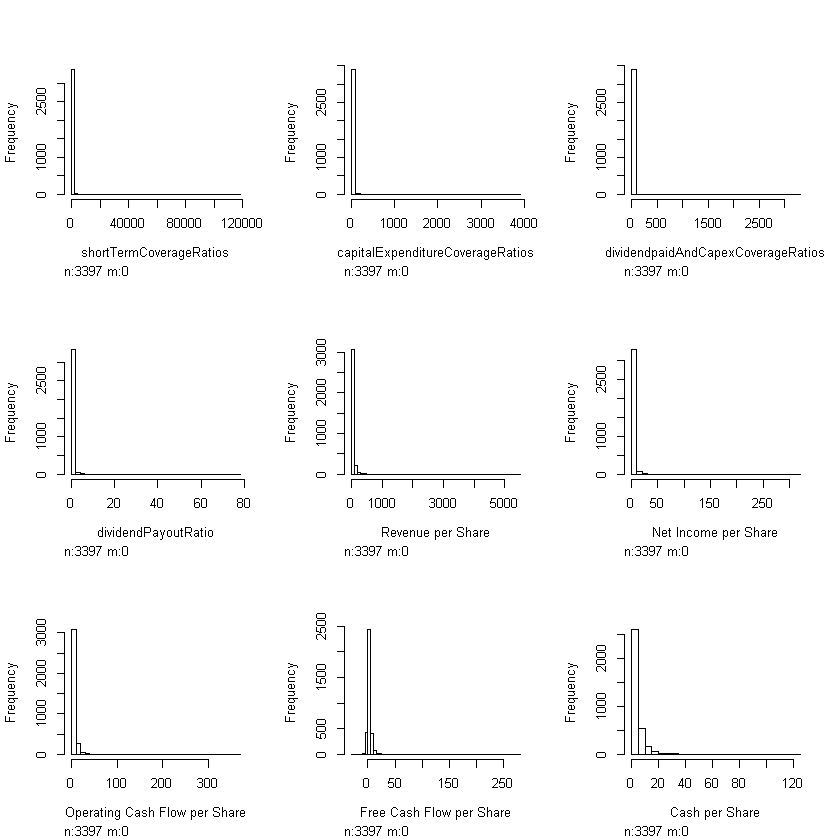

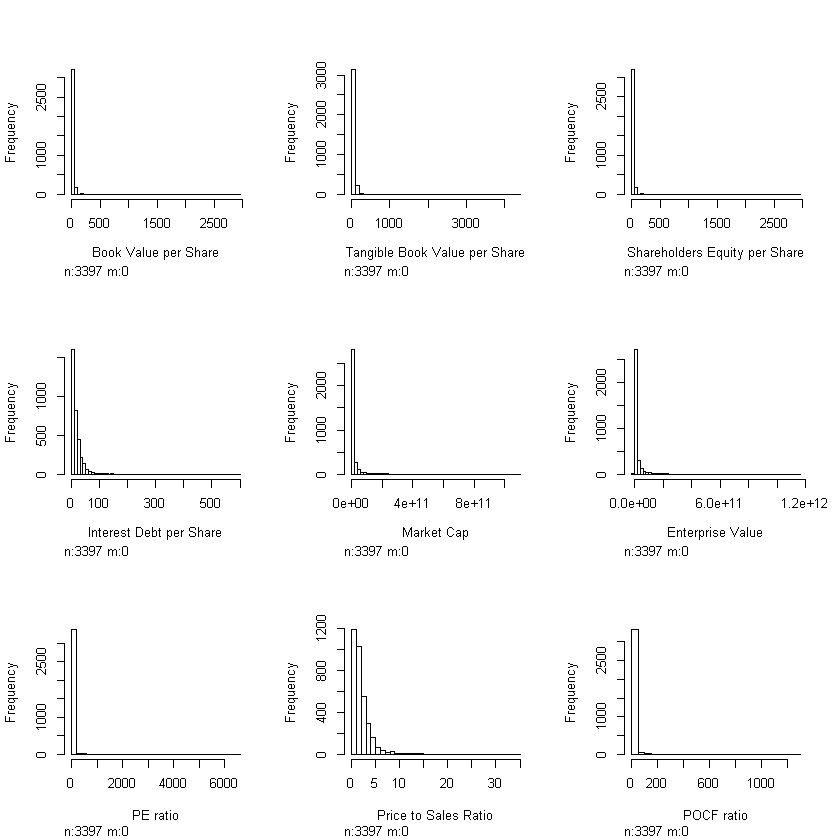

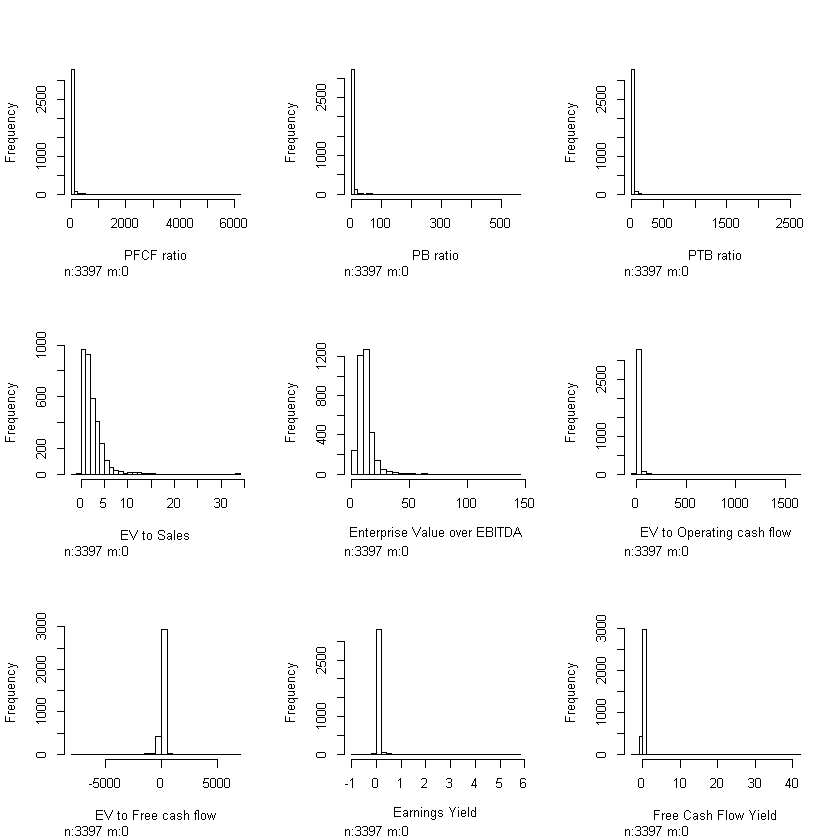

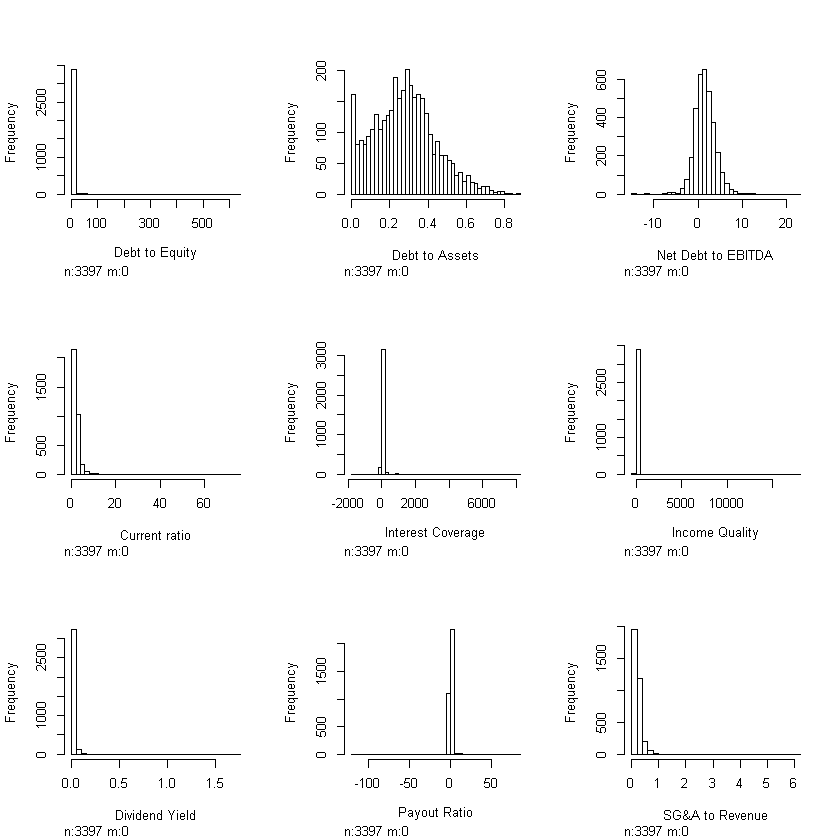

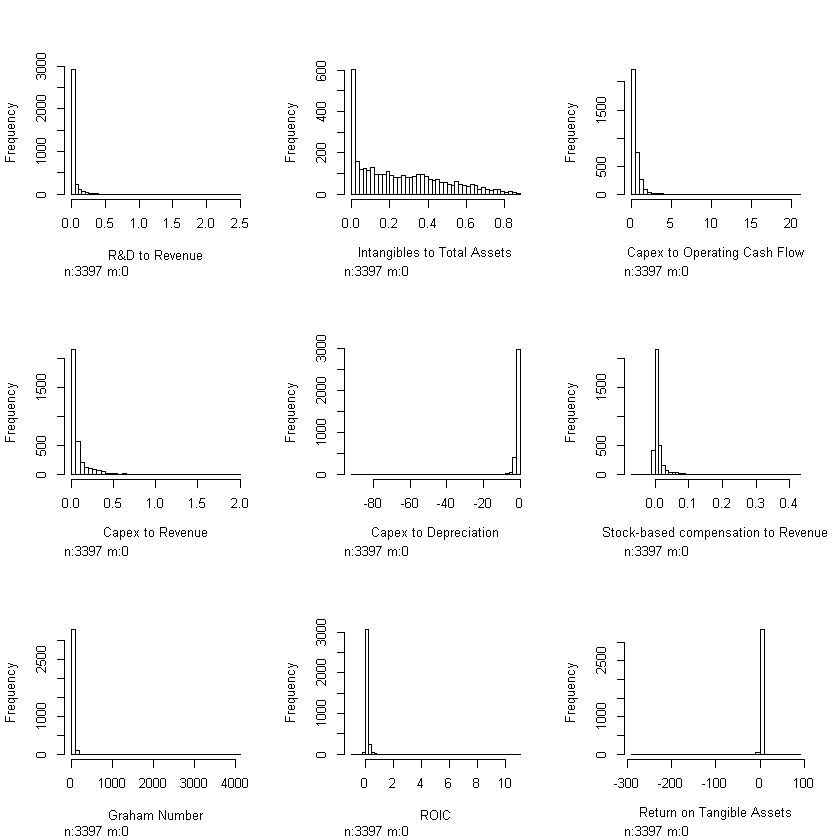

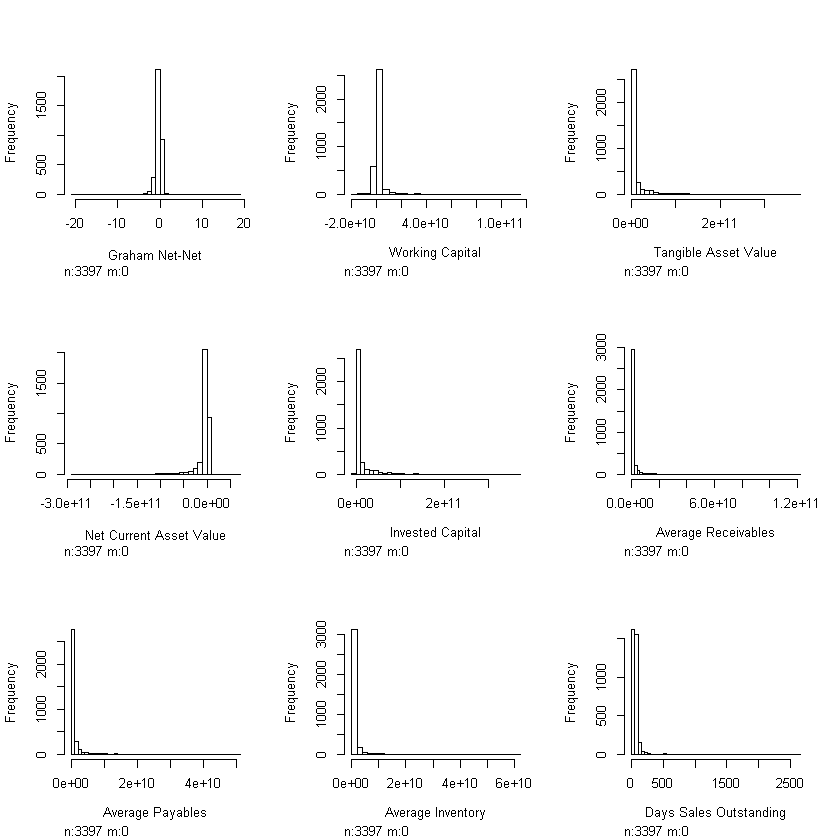

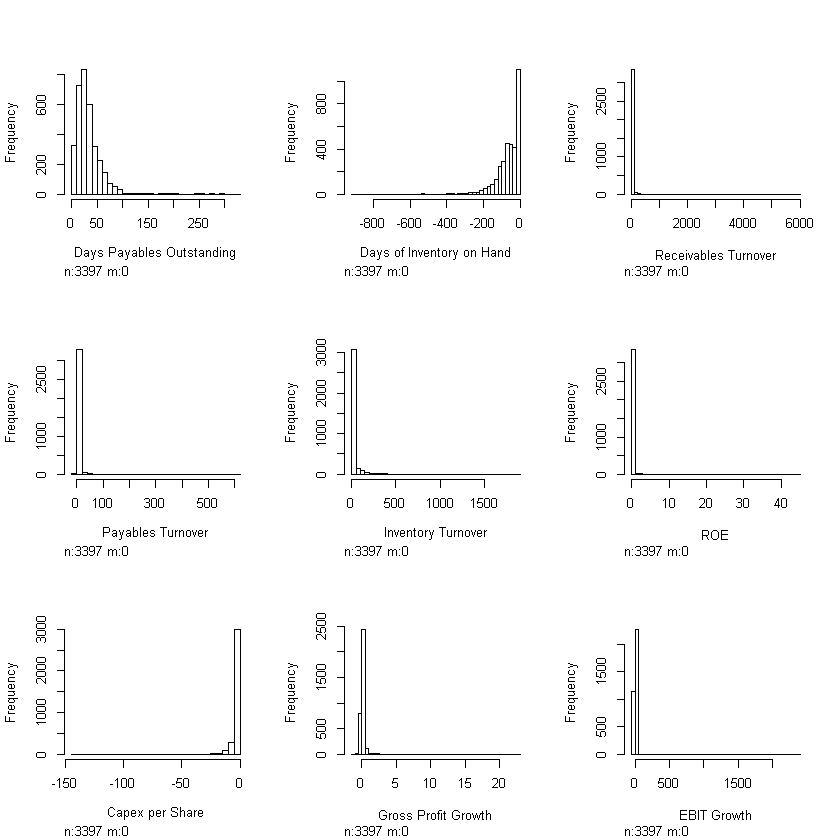

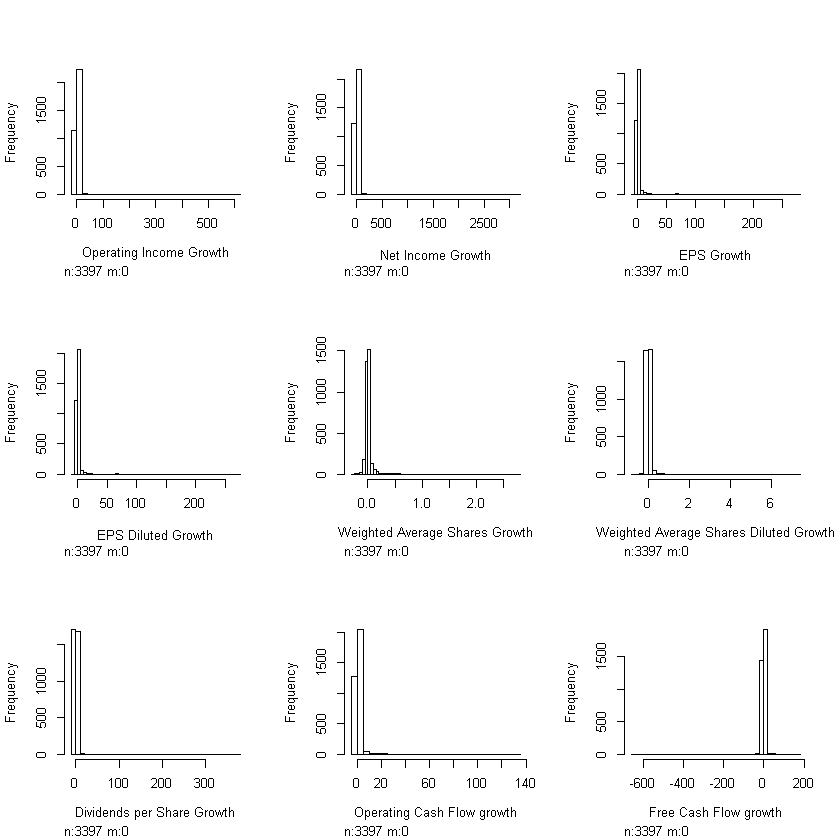

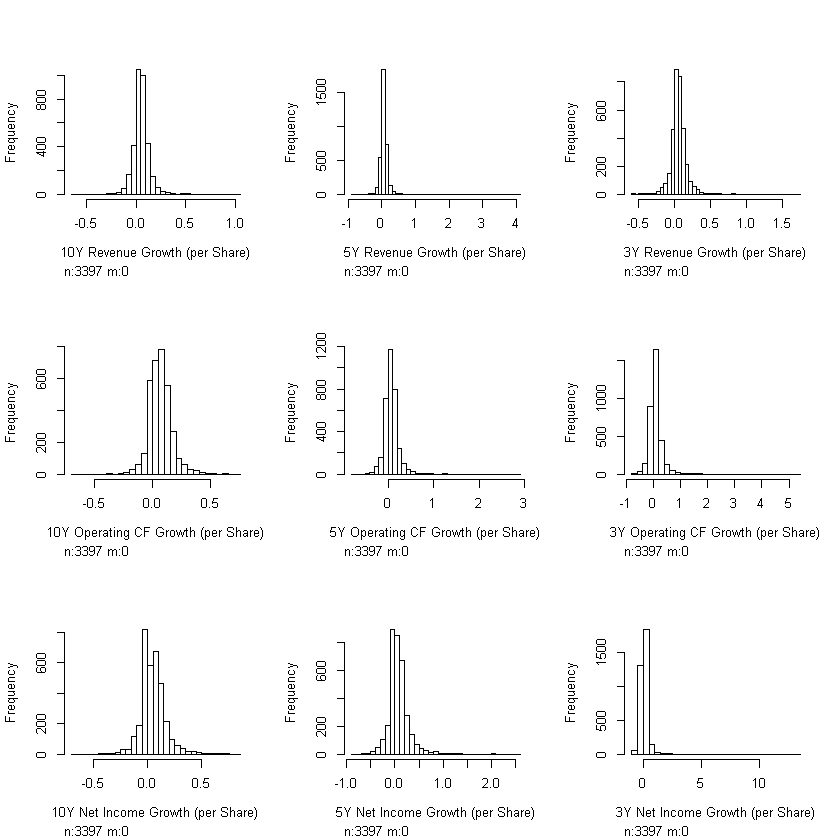

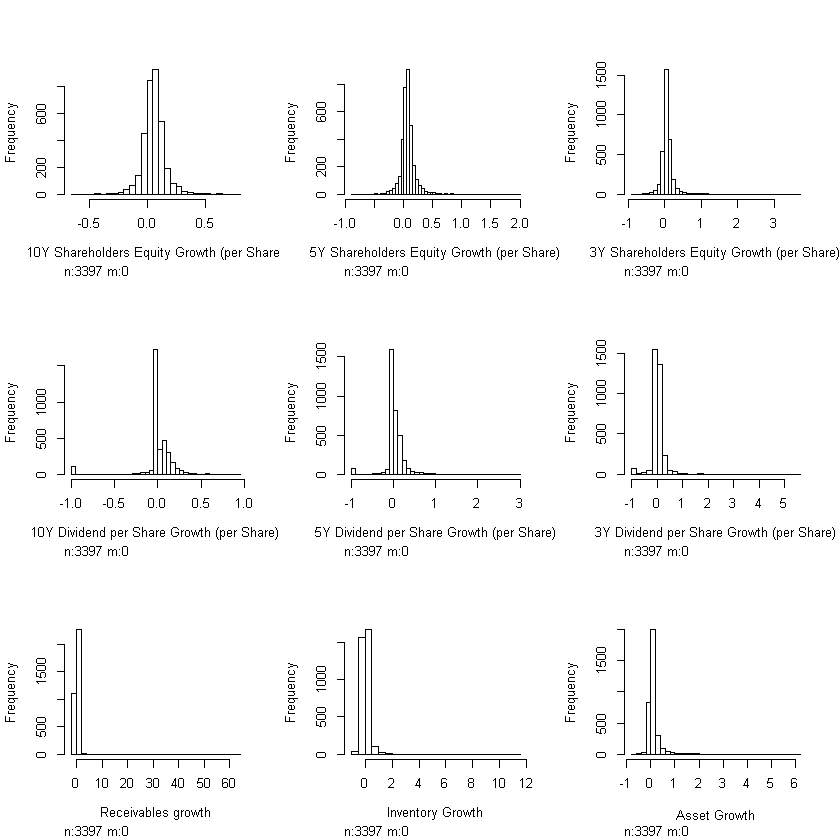

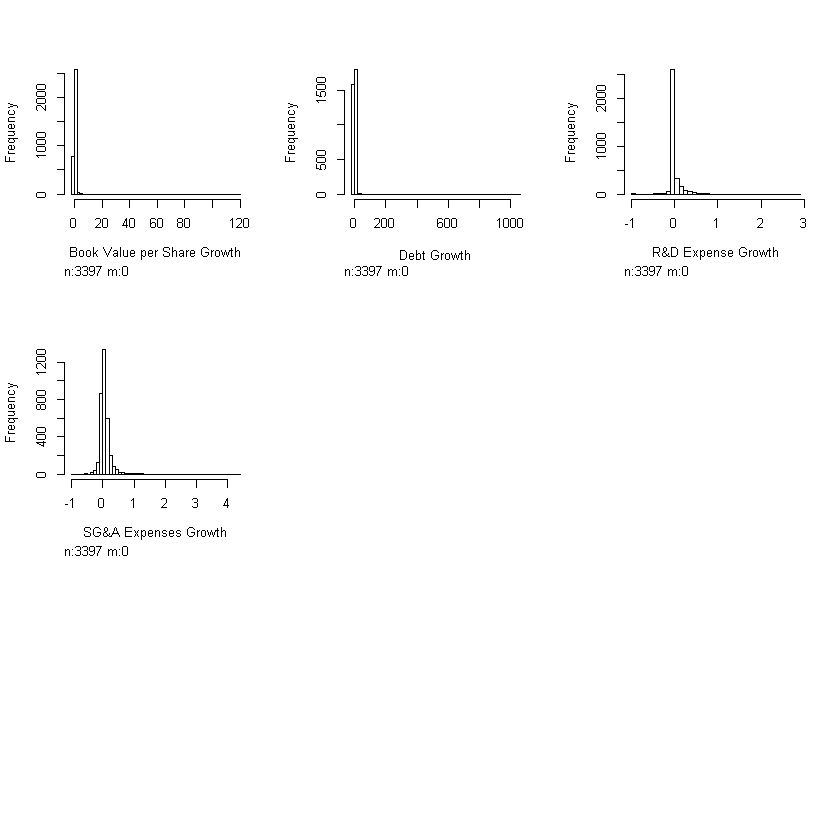

In [27]:
#Changing the plot to a 3 by 3 layout
par(mfrow=c(3,3))

hist.data.frame(df, breaks = 50)

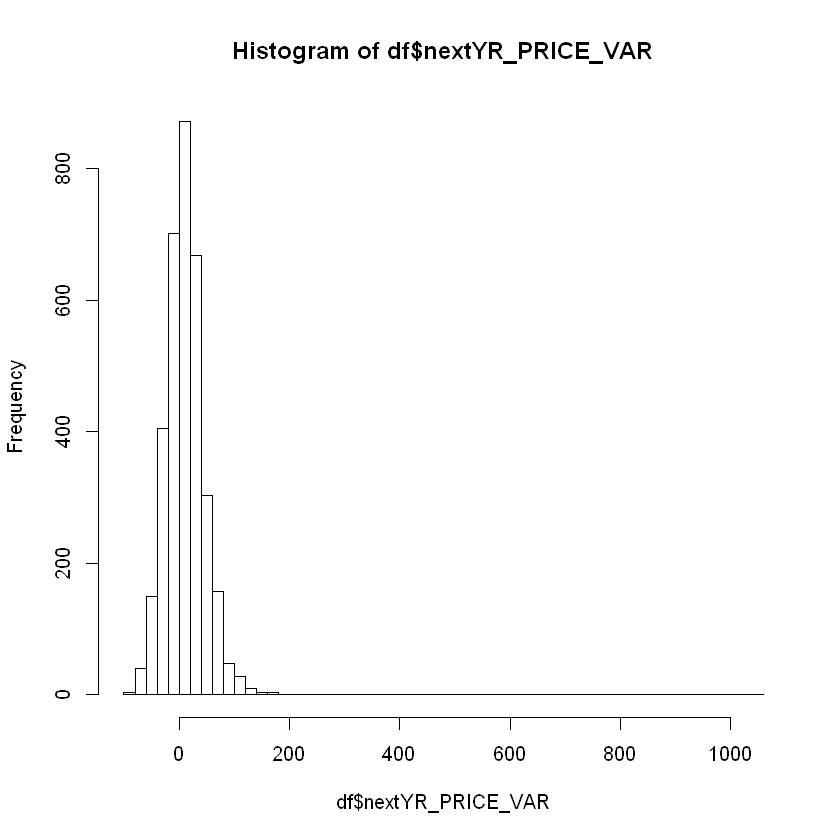

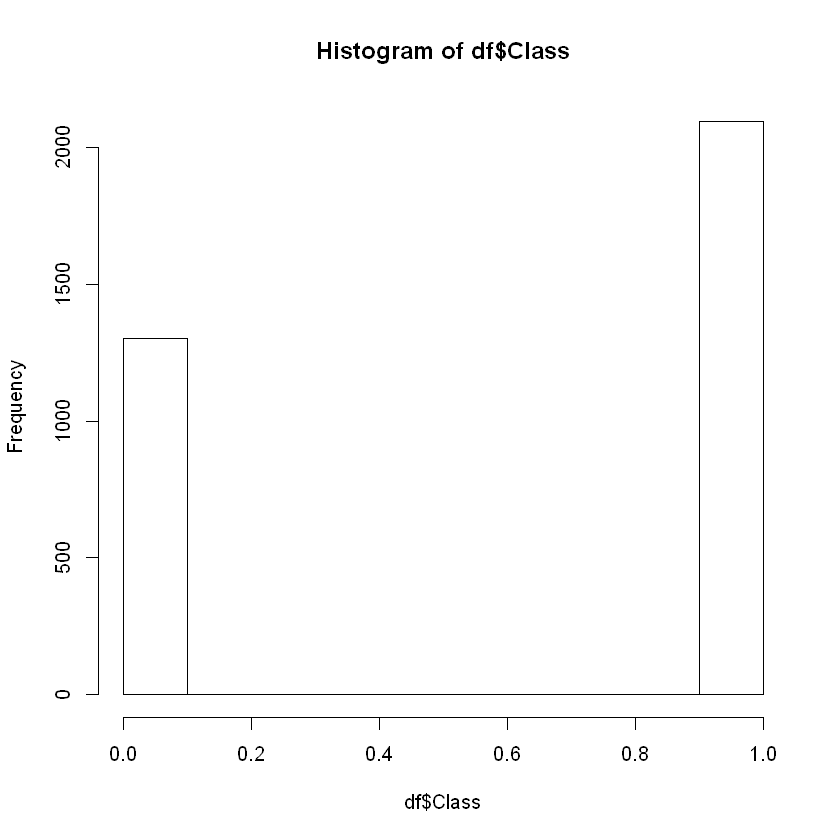

In [28]:
#Changing the plot back to a single graph to better look at specific variables on their own
par(mfrow=c(1,1))

hist(df$nextYR_PRICE_VAR, breaks = 50)
hist(df$Class)

### Additional Understanding

 - The main question that I still have is the amount of duplicated variables in the data set. I will look further into this issue in the next notebook.

## Verifying the Data Quality

### Data Source and Reliability

- Data Origin: The data was pulled using company financial data and was aggregated by Nicolas Carbone on Kaggle. He obtained the data by using Financial Modeling Prep API. It was then posted to Kaggle for others to use as well.
- Reliability: After looking into the Financial Modeling Prep API, it looks as though they pull their information directly from stock exchanges and company financial documents. This leads me to believe that the data set is reliable but far from complete.

### Error Handling

 - While there were not glaring errors that were found in the dataset, I am concerned that some of the extreme outliers may have been input errors when the data was being compiled. While I have not dealt with these values yet, I intend to look into them further in the next notebook when I finalize the dataset. 
 - I also found that many of the column names in the dataset are duplicates. While they do not match up identically, they show the same information. For example, "Payout Ratio" and "payoutRatio" are both variables in the data set. This will need to be corrected in the next notebook.

### Missing Data

 - There is a large amount of missing data in the dataset. Some of the variables are missing over half of their values and a large chunk of the variables are missing anywhere between 25 - 50% of the observations. I will deal with this issue in the remaining notebooks.

## Outcome 

In [29]:
#Exporting the data set to CSV a final time to include the removal of the outliers
fwrite(data, paste0(dir$final_data, 'combined_financial.csv'))